### Исследование данных с целью:
Задача:
1.кластеризовать регионы России и определить, какие из них наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения;
описать группы населения, сталкивающиеся с бедностью;
2.определить:
влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе;
связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе;
какие ещё зависимости можно наблюдать относительно социально незащищённых слоёв населения.

### 1.Загрузка данных
# 1.1 Загрузка библиотек

In [345]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


# 1.2. Загрузка датасетов

In [346]:
# Загрузка данных
disabled_total_by_age_2017_2022 = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/disabled_total_by_age_2017_2022.csv')
newborn_2006_2022_monthly = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/newborn_2006_2022_monthly.csv', sep=':')
poverty_procent_by_regions_1992_2020 = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/poverty_percent_by_regions_1992_2020.csv')
regional_production_2005_2016 = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/regional_production_2005_2016.csv')
regional_production_2017_2020 = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/regional_production_2017_2020.csv')
cash_real_income_wages_2015_2020 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/cash_real_income_wages_2015_2020.xlsx')
child_mortality_rural_1990_2021 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/child_mortality_rural_1990_2021.xls')
child_mortality_urban_1990_2021 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/child_mortality_urban_1990_2021.xls')
drug_alco = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/drug_alco.xlsx')
housing_2020 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/housing_2020.xlsx')
morbidity_2005_2020_age_disease = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/zabolevania.xls')
population = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/population.xlsx')
poverty_socdem_2017 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/poverty_socdem_2017.xls')
poverty_socdem_2018 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/poverty_socdem_2018.xls')
poverty_socdem_2019 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/poverty_socdem_2019.xls')
poverty_socdem_2020 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/poverty_socdem_2020.xls')
retail_turnover_per_capita_2000_2021 = pd.read_excel('C:/users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/retail_turnover_per_capita_2000_2021.xls')
welfare_expense_share_2015_2020 = pd.read_excel('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Diplom/social_russia_data/welfare_expense_share_2015_2020.xlsx')

# Проверьте данные
dataframes = [
    disabled_total_by_age_2017_2022,
    newborn_2006_2022_monthly,
    poverty_procent_by_regions_1992_2020,
    regional_production_2005_2016,
    regional_production_2017_2020,
    cash_real_income_wages_2015_2020,
    child_mortality_rural_1990_2021,
    child_mortality_urban_1990_2021,
    drug_alco,
    housing_2020,
    morbidity_2005_2020_age_disease,
    population,
    poverty_socdem_2017,
    poverty_socdem_2018,
    poverty_socdem_2019,
    poverty_socdem_2020,
    retail_turnover_per_capita_2000_2021,
    welfare_expense_share_2015_2020,
]

# Проверка на наличие пропусков и просмотр первых строк
#for df in dataframes:
    #print(df.info())
    #print(df.head())


# 1.3. Вывод названий столбцов датасетов

In [347]:

# Проверяем названия колонок 
dataframes = [
    disabled_total_by_age_2017_2022,
    newborn_2006_2022_monthly,
    poverty_procent_by_regions_1992_2020,
    regional_production_2005_2016,
    regional_production_2017_2020,
    cash_real_income_wages_2015_2020,
    child_mortality_rural_1990_2021,
    child_mortality_urban_1990_2021,
    drug_alco,
    housing_2020,
    morbidity_2005_2020_age_disease,
    population,
    poverty_socdem_2017,
    poverty_socdem_2018,
    poverty_socdem_2019,
    poverty_socdem_2020,
    retail_turnover_per_capita_2000_2021,
    welfare_expense_share_2015_2020,
]
columns1 = disabled_total_by_age_2017_2022.columns.tolist()
columns2= newborn_2006_2022_monthly.columns.tolist(),
columns3=poverty_procent_by_regions_1992_2020.columns.tolist(),
columns4=regional_production_2005_2016.columns.tolist(),
columns5=regional_production_2017_2020.columns.tolist(),
columns6=cash_real_income_wages_2015_2020.columns.tolist(),
columns7=child_mortality_rural_1990_2021.columns.tolist(),
columns8=child_mortality_urban_1990_2021.columns.tolist(),
columns9=drug_alco.columns.tolist(),
columns10=housing_2020.columns.tolist(),
columns11=morbidity_2005_2020_age_disease.columns.tolist(),
columns12=population.columns.tolist(),
columns13=poverty_socdem_2017.columns.tolist(),
columns14=poverty_socdem_2018.columns.tolist(),
columns15=poverty_socdem_2019.columns.tolist(),
columns16=poverty_socdem_2020.columns.tolist(),
columns17=retail_turnover_per_capita_2000_2021.columns.tolist(),
columns18=welfare_expense_share_2015_2020.columns.tolist(),
print(columns1)
print(columns2)
print(columns3)
print(columns4)
print(columns5)
print(columns6)
print(columns7)
print(columns8)
print(columns9)
print(columns10)
print(columns11)
print(columns12)
print(columns13)
print(columns14)
print(columns15)
print(columns16)
print(columns17)
print(columns18)

['region', 'total', '18_30', '31_40', '41_50', '51_60', '60_', 'date']
(['Region;январь 2006 г.;февраль 2006 г.;март 2006 г.;апрель 2006 г.;май 2006 г.;июнь 2006 г.;июль 2006 г.;август 2006 г.;сентябрь 2006 г.;октябрь 2006 г.;ноябрь 2006 г.;декабрь 2006 г.;январь 2007 г.;февраль 2007 г.;март 2007 г.;апрель 2007 г.;май 2007 г.;июнь 2007 г.;июль 2007 г.;август 2007 г.;сентябрь 2007 г.;октябрь 2007 г.;ноябрь 2007 г.;декабрь 2007 г.;январь 2008 г.;февраль 2008 г.;март 2008 г.;апрель 2008 г.;май 2008 г.;июнь 2008 г.;июль 2008 г.;август 2008 г.;сентябрь 2008 г.;октябрь 2008 г.;ноябрь 2008 г.;декабрь 2008 г.;январь 2009 г.;февраль 2009 г.;март 2009 г.;апрель 2009 г.;май 2009 г.;июнь 2009 г.;июль 2009 г.;август 2009 г.;сентябрь 2009 г.;октябрь 2009 г.;ноябрь 2009 г.;декабрь 2009 г.;январь 2010 г.;февраль 2010 г.;март 2010 г.;апрель 2010 г.;май 2010 г.;июнь 2010 г.;июль 2010 г.;август 2010 г.;сентябрь 2010 г.;октябрь 2010 г.;ноябрь 2010 г.;декабрь 2010 г.;январь 2011 г.;февраль 2011 г.;март 201

# 1.4. Создание стандартизированного списка регионов

In [348]:
#Приведем колонку Регион к стандартным знаечниям
standard_regions = [
    'Республика Адыгея', 'Республика Алтай', 'Республика Башкортостан', 'Республика Бурятия', 
    'Республика Дагестан', 'Республика Ингушетия', 'Кабардино-Балкарская Республика', 'Республика Калмыкия', 
    'Карачаево-Черкесская Республика', 'Республика Карелия', 'Республика Коми', 'Республика Крым', 
    'Республика Марий Эл', 'Республика Мордовия', 'Республика Саха (Якутия)', 'Республика Северная Осетия — Алания', 
    'Республика Татарстан', 'Республика Тыва', 'Удмуртская Республика', 'Республика Хакасия', 
    'Чеченская Республика', 'Чувашская Республика', 'Алтайский край', 'Забайкальский край', 'Камчатский край', 
    'Краснодарский край', 'Красноярский край', 'Пермский край', 'Приморский край', 'Ставропольский край', 
    'Хабаровский край', 'Амурская область', 'Архангельская область', 'Астраханская область', 
    'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 
    'Вологодская область', 'Воронежская область', 'Ивановская область', 'Иркутская область', 
    'Калининградская область', 'Калужская область', 'Кемеровская область — Кузбасс', 'Кировская область', 
    'Костромская область', 'Курганская область', 'Курская область', 'Ленинградская область', 
    'Липецкая область', 'Магаданская область', 'Московская область', 'Мурманская область', 'Нижегородская область', 
    'Новгородская область', 'Новосибирская область', 'Омская область', 'Оренбургская область', 'Орловская область', 
    'Пензенская область', 'Псковская область', 'Ростовская область', 'Рязанская область', 'Самарская область', 
    'Саратовская область', 'Сахалинская область', 'Свердловская область', 'Смоленская область', 'Тамбовская область', 
    'Тверская область', 'Томская область', 'Тульская область', 'Тюменская область', 'Ульяновская область', 
    'Челябинская область', 'Ярославская область', 'Москва', 'Санкт-Петербург', 'Севастополь', 
    'Еврейская автономная область', 'Ненецкий автономный округ', 'Ханты-Мансийский автономный округ — Югра', 
    'Чукотский автономный округ', 'Ямало-Ненецкий автономный округ'
]
region_mapping = {
    # Города федерального значения
    'г москва': 'Москва',
    'москва г.': 'Москва',
    'г. москва': 'Москва',
    'санкт-петербург г.': 'Санкт-Петербург',
    'г санкт-петербург': 'Санкт-Петербург',
    'петербург': 'Санкт-Петербург',
    'г севастополь': 'Севастополь',

    # Республики
    'республика татарстан': 'Республика Татарстан',
    'татарстан': 'Республика Татарстан',
    'респ. татарстан': 'Республика Татарстан',
    'респ татарстан': 'Республика Татарстан',
    
    'республика башкортостан': 'Республика Башкортостан',
    'респ. башкортостан': 'Республика Башкортостан',
    'башкортостан': 'Республика Башкортостан',

    'республика крым': 'Республика Крым',
    'крым': 'Республика Крым',

    'республика саха (якутия)': 'Республика Саха (Якутия)',
    'саха (якутия)': 'Республика Саха (Якутия)',

    'республика северная осетия - алания': 'Республика Северная Осетия — Алания',
    'северная осетия': 'Республика Северная Осетия — Алания',

    # Края
    'алтайский край': 'Алтайский край',
    'краснодарский край': 'Краснодарский край',
    'красноярский край': 'Красноярский край',
    'ставропольский край': 'Ставропольский край',
    'приморский край': 'Приморский край',
    'пермский край': 'Пермский край',
    
    # Области
    'московская обл.': 'Московская область',
    'московская обл': 'Московская область',
    'ленинградская обл.': 'Ленинградская область',
    'свердловская обл.': 'Свердловская область',
    'челябинская обл.': 'Челябинская область',
    'новосибирская обл.': 'Новосибирская область',
    'тюменская обл.': 'Тюменская область',
    'ростовская обл.': 'Ростовская область',
    'самарская обл.': 'Самарская область',
    'вологодская обл.': 'Вологодская область',
    'воронежская обл.': 'Воронежская область',
    'курская обл.': 'Курская область',
    'ульяновская обл.': 'Ульяновская область',
    'рязанская обл.': 'Рязанская область',

    # Автономные округа
    'ханты-мансийский ао': 'Ханты-Мансийский автономный округ — Югра',
    'хмао': 'Ханты-Мансийский автономный округ — Югра',
    'ямало-ненецкий ао': 'Ямало-Ненецкий автономный округ',
    'янао': 'Ямало-Ненецкий автономный округ',

    # Прочие регионы
    'еврейская ао': 'Еврейская автономная область',
    'чукотский ао': 'Чукотский автономный округ',
}

### 2. Люди с ограниченными возможностями

In [349]:
#display(disabled_total_by_age_2017_2022)
# Переименование колонки 'region' на 'Регион'
disabled_total_by_age_2017_2022.rename(columns={'region': 'Регион'}, inplace=True)
# Переименование колонки 'region' на 'Регион'
disabled_total_by_age_2017_2022.rename(columns={'total': 'Всего инвалидов'}, inplace=True)

# Преобразование даты в отдельные колонки для года и месяца
disabled_total_by_age_2017_2022['Год'] = pd.to_datetime(disabled_total_by_age_2017_2022['date']).dt.year
disabled_total_by_age_2017_2022['Месяц'] = pd.to_datetime(disabled_total_by_age_2017_2022['date']).dt.month

# Теперь можно использовать melt
disabled_total_by_age_2017_2022_melted = disabled_total_by_age_2017_2022.melt(
    id_vars=['Регион', 'Год', 'Месяц'], 
    value_vars=['18_30', '31_40', '41_50', '51_60', '60_'], 
    var_name='Возраст', 
    value_name='Значение'
)


# Проверка изменений
#print(disabled_total_by_age_2017_2022.head())

# Перемещаем возрастные группы в одну колонку 'Возраст', а значения в колонку 'Значение'
disabled_total_by_age_2017_2022_melted = disabled_total_by_age_2017_2022.melt(id_vars=['Регион', 'Год', 'Месяц'], 
                    value_vars=['18_30', '31_40', '41_50', '51_60', '60_'], 
                    var_name='Возраст', 
                    value_name='Значение')

# Преобразуем в окончательную таблицу с годами и месяцами как колонками
disabled_total_by_age_2017_2022_final = disabled_total_by_age_2017_2022_melted.pivot_table(index=['Регион', 'Возраст'], 
                                 columns=['Год', 'Месяц'], 
                                 values='Значение').reset_index()

# Переименование колонок
disabled_total_by_age_2017_2022.rename(columns={'region': 'Регион', 'total': 'Всего инвалидов'}, inplace=True)

# Преобразование даты в отдельные колонки для года и месяца
disabled_total_by_age_2017_2022['Год'] = pd.to_datetime(disabled_total_by_age_2017_2022['date']).dt.year
disabled_total_by_age_2017_2022['Месяц'] = pd.to_datetime(disabled_total_by_age_2017_2022['date']).dt.month

# Перемещаем возрастные группы в одну колонку 'Возраст', а значения в колонку 'Значение'
disabled_total_by_age_2017_2022_melted = disabled_total_by_age_2017_2022.melt(id_vars=['Регион', 'Год', 'Месяц'], 
                    value_vars=['18_30', '31_40', '41_50', '51_60', '60_'], 
                    var_name='Возраст', 
                    value_name='Значение')

# Суммируем значения по годам и возрастным группам, убираем месяц
disabled_total_by_age_2017_2022_final = disabled_total_by_age_2017_2022_melted.groupby(['Регион', 'Возраст', 'Год'], as_index=False).agg({'Значение': 'sum'})
# Проверка результата
print(disabled_total_by_age_2017_2022_final)
# Получение уникальных значений в определенном столбце
unique_values = disabled_total_by_age_2017_2022_final['Регион'].unique()

# Печать уникальных значений
#print(unique_values)
# Приведение столбца 'Регион' к нижнему регистру и удаление лишних пробелов
disabled_total_by_age_2017_2022['Регион'] = disabled_total_by_age_2017_2022['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
disabled_total_by_age_2017_2022['Регион'] = disabled_total_by_age_2017_2022['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
disabled_total_by_age_2017_2022['Регион'] = disabled_total_by_age_2017_2022['Регион'].apply(lambda x: x.title())

# Проверка результата
print(disabled_total_by_age_2017_2022['Регион'].unique())


                 Регион Возраст   Год   Значение
0        Алтайский край   18_30  2017  94,519.00
1        Алтайский край   18_30  2018  95,338.00
2        Алтайский край   18_30  2019  89,164.00
3        Алтайский край   18_30  2020  85,613.00
4        Алтайский край   18_30  2021  86,568.00
...                 ...     ...   ...        ...
2845  город Севастополь     60_  2018 145,360.00
2846  город Севастополь     60_  2019 149,814.00
2847  город Севастополь     60_  2020 153,215.00
2848  город Севастополь     60_  2021 157,225.00
2849  город Севастополь     60_  2022  52,091.00

[2850 rows x 4 columns]
['Российская Федерация' 'Центральный Федеральный Округ'
 'Белгородская Область' 'Брянская Область' 'Владимирская Область'
 'Воронежская Область' 'Ивановская Область' 'Калужская Область'
 'Костромская Область' 'Курская Область' 'Липецкая Область'
 'Орловская Область' 'Рязанская Область' 'Смоленская Область'
 'Тамбовская Область' 'Тверская Область' 'Тульская Область'
 'Ярославская Облас

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\4056802720.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_10_data, x='Год', y='Значение', hue='Регион', ci=None)


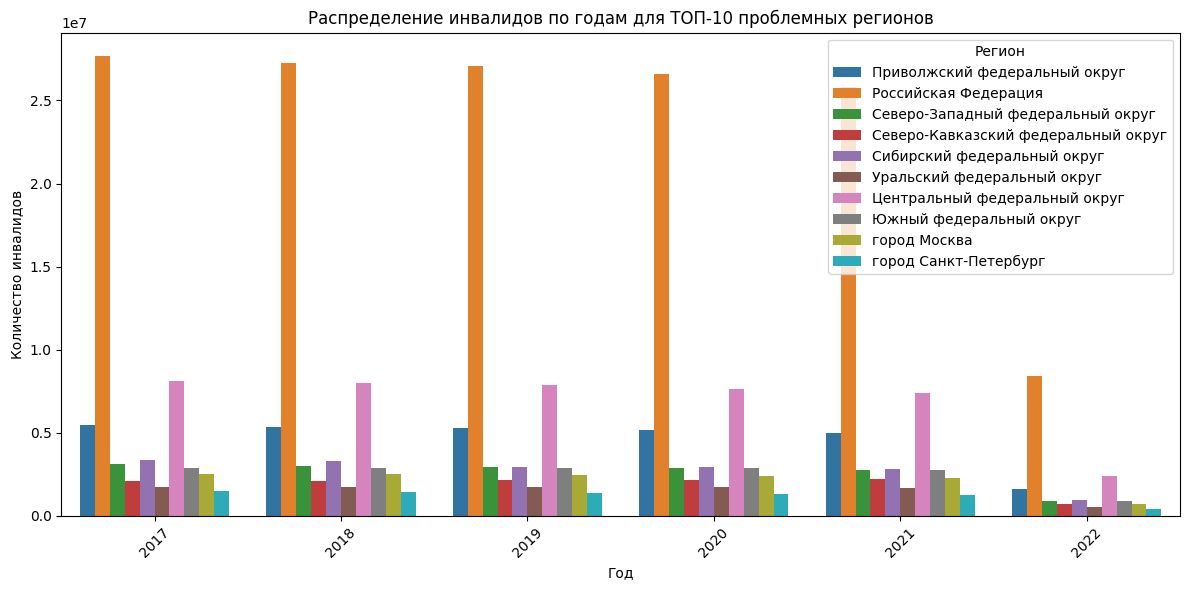

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\4056802720.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_10_data, x='Возраст', y='Значение', hue='Регион', ci=None)


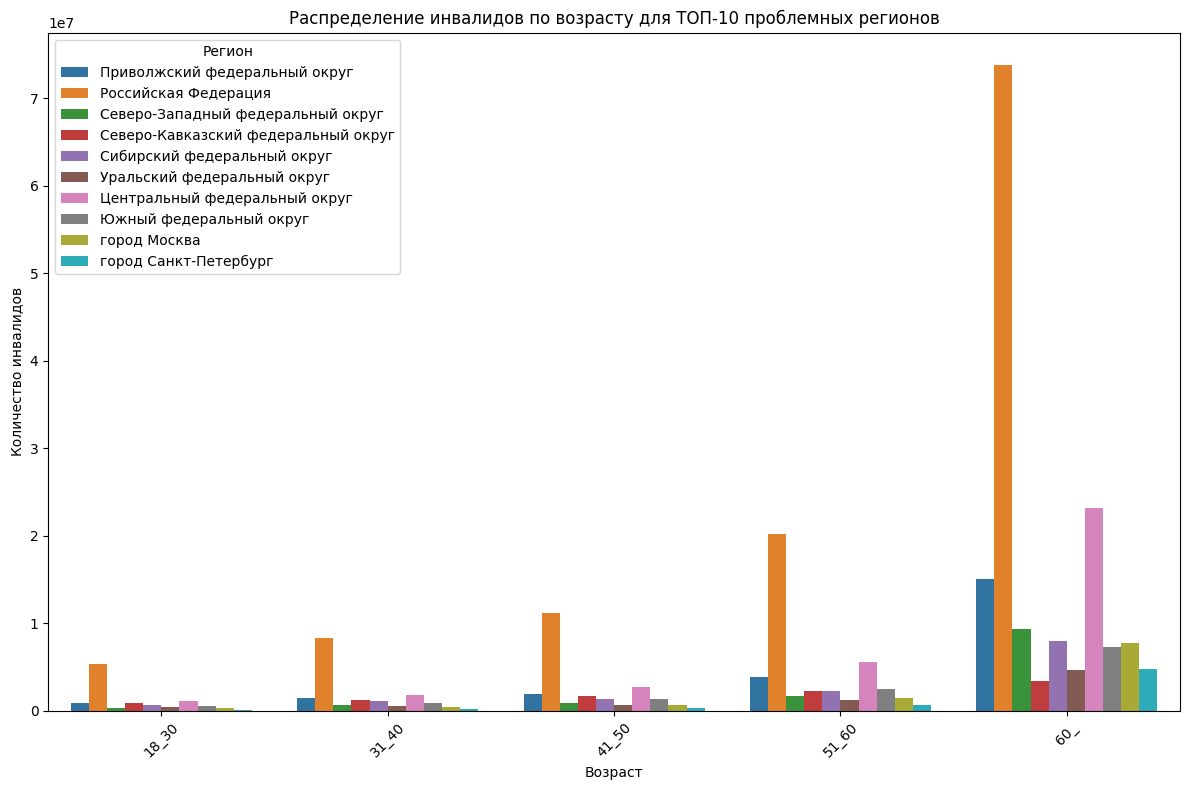

In [350]:
# Суммируем значения инвалидов по регионам
top_regions = disabled_total_by_age_2017_2022_final.groupby('Регион', as_index=False).agg({'Значение': 'sum'})

# Сортируем по количеству инвалидов в порядке убывания
top_regions = top_regions.sort_values(by='Значение', ascending=False)

# Выбираем ТОП-10 проблемных регионов
top_10_regions = top_regions.head(10)

# Фильтруем оригинальный датафрейм для ТОП-10 регионов
top_10_data = disabled_total_by_age_2017_2022_final[disabled_total_by_age_2017_2022_final['Регион'].isin(top_10_regions['Регион'])]

# График 1: Распределение инвалидов по годам для ТОП-10 регионов
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_data, x='Год', y='Значение', hue='Регион', ci=None)
plt.title('Распределение инвалидов по годам для ТОП-10 проблемных регионов')
plt.xlabel('Год')
plt.ylabel('Количество инвалидов')
plt.legend(title='Регион')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График 2: Распределение инвалидов по возрасту, годам и регионам для ТОП-10
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_data, x='Возраст', y='Значение', hue='Регион', ci=None)
plt.title('Распределение инвалидов по возрасту для ТОП-10 проблемных регионов')
plt.xlabel('Возраст')
plt.ylabel('Количество инвалидов')
plt.legend(title='Регион')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\2637236771.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled = scaler.fit_transform(df_pivot.drop('Регион', axis=1))


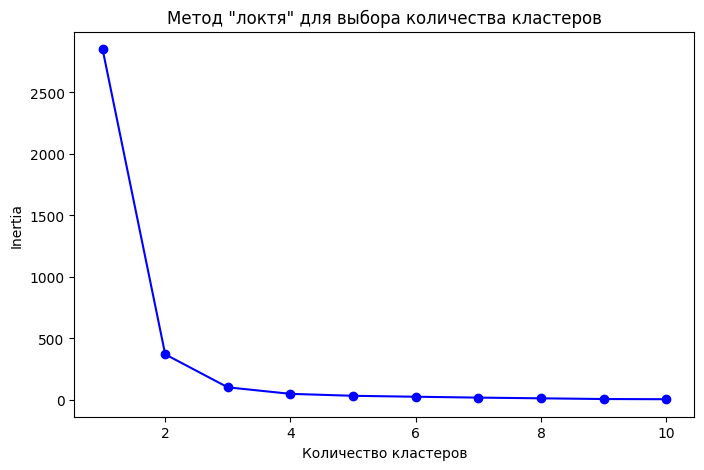

Распределение регионов по кластерам:

Кластер 0:
['Алтайский край', 'Амурская область', 'Архангельская область', 'Астраханская область', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Вологодская область', 'Воронежская область', 'Дальневосточный федеральный округ', 'Еврейская автономная область', 'Забайкальский край', 'Ивановская область', 'Иркутская область', 'Кабардино-Балкарская Республика', 'Калининградская область', 'Калужская область', 'Камчатский край', 'Карачаево-Черкесская Республика', 'Кемеровская область', 'Кировская область', 'Костромская область', 'Краснодарский край', 'Красноярский край', 'Курганская область', 'Курская область', 'Ленинградская область', 'Липецкая область', 'Магаданская область', 'Московская область', 'Мурманская область', 'Ненецкий автономный округ', 'Нижегородская область', 'Новгородская область', 'Новосибирская область', 'Омская область', 'Оренбургская область', 'Орловская область', 'Пензенская область', 'П

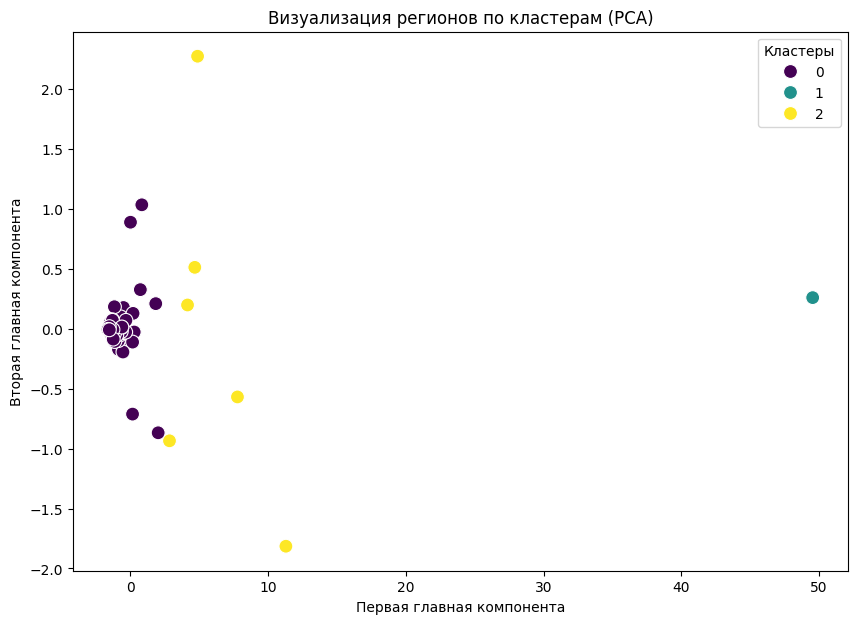

In [351]:
# Преобразование столбца 'Значение' в числовой формат (с заменой запятых на точки)
disabled_total_by_age_2017_2022_final['Значение'] = disabled_total_by_age_2017_2022_final['Значение'].astype(str).str.replace(',', '.')
disabled_total_by_age_2017_2022_final['Значение'] = pd.to_numeric(disabled_total_by_age_2017_2022_final['Значение'], errors='coerce')

# Преобразуем данные в более широкий формат (pivot)
df_pivot = disabled_total_by_age_2017_2022_final.pivot_table(index='Регион', columns=['Возраст', 'Год'], values='Значение').reset_index()

# Масштабируем данные (кроме столбца с регионами)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot.drop('Регион', axis=1))

# Определяем количество кластеров (метод локтя)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Построим график метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод "локтя" для выбора количества кластеров')
plt.show()

# Выбираем 3 кластера (по результатам анализа локтя)
kmeans = KMeans(n_clusters=3, random_state=42)
df_pivot['Cluster'] = kmeans.fit_predict(X_scaled)

# 1. Отображение распределения регионов по кластерам
print("Распределение регионов по кластерам:")
for cluster in df_pivot['Cluster'].unique():
    print(f"\nКластер {cluster}:")
    print(df_pivot[df_pivot['Cluster'] == cluster]['Регион'].tolist())

# 2. Визуализация кластеров с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_pivot['Cluster'], palette='viridis', s=100)
plt.title('Визуализация регионов по кластерам (PCA)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend(title='Кластеры')
plt.show()


### Выводы: 
График распределение по годам: Уменьшается среднее количество инвалидов во всех регионах и в целом в Российской Федерации. Проблемынми остаются регионы: 
Центральный Федеральный округ, Приволжский Федеральный округ. 
График распределния по возрасту показывает, что больше всего инвалидов старше 60 лет. Здесь к проблемынм можно добавить Сверо-Западный Федеральный округ
Распределение по Кластерам тоже дает подстверждение выбранным проблемным регионам (Кластер 2):['Приволжский федеральный округ', 'Северо-Западный федеральный округ', 'Северо-Кавказский федеральный округ', 'Сибирский федеральный округ', 'Центральный федеральный округ', 'Южный федеральный округ']


### 3. Количество новорожденных по регионам

In [352]:

# Преобразование данных в нужный формат
newborn_data_cleaned = newborn_2006_2022_monthly.iloc[:, 0].str.split(';', expand=True)

# Проверка количества столбцов после разделения
num_columns = newborn_data_cleaned.shape[1]
print("Количество столбцов после разделения:", num_columns)

# Определите месяцы и годы
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 
          'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
years = range(2006, 2023)  # 2006-2022, всего 17 лет

# Создайте новые названия столбцов в формате 'месяц год'
new_columns = ['Регион'] + [f'{month} {year}' for year in years for month in months]

# Переименование первого столбца в 'Регион'
newborn_data_cleaned.rename(columns={0: 'Регион'}, inplace=True)

# Убедитесь, что количество столбцов совпадает
if len(new_columns) == num_columns:
    newborn_data_cleaned.columns = new_columns
else:
    print("Ошибка: количество столбцов не совпадает. Ожидалось:", len(new_columns), "фактически:", num_columns)

# Преобразование значений в числовой формат (замените запятые на точки и преобразуйте в float)
for column in newborn_data_cleaned.columns[1:]:
    newborn_data_cleaned[column] = newborn_data_cleaned[column].replace('', np.nan)  # Заменяем пустые строки на NaN
    newborn_data_cleaned[column] = newborn_data_cleaned[column].astype(str).str.replace(',', '.')  # Заменяем запятые
    newborn_data_cleaned[column] = pd.to_numeric(newborn_data_cleaned[column], errors='coerce')  # Преобразуем в float

# Печать структуры датафрейма после изменений
#print(newborn_data_cleaned.info())

# Создаем новый датафрейм для хранения сумм по годам
newborn_data_cleaned_sums = newborn_data_cleaned.copy()

# Добавляем колонки для каждого года, используя метод `sum` с диапазоном
for year in years:
    start_col = (year - 2006) * 12 + 1
    end_col = start_col + 11  # 12 месяцев
    newborn_data_cleaned_sums[year] = newborn_data_cleaned_sums.iloc[:, start_col:end_col].sum(axis=1)

# Удаление исходных столбцов
newborn_data_cleaned_sums.drop(columns=newborn_data_cleaned_sums.columns[1:198], inplace=True)

# Проверка результата
#print(newborn_data_cleaned_sums.head())

# Преобразование данных в формат с колонками 'Регион', 'Год', 'Количество новорожденных'
newborn_data_long = newborn_data_cleaned_sums.melt(id_vars=['Регион'], 
                                                    var_name='Год', 
                                                    value_name='Количество новорожденных')

# Преобразуем тип данных в колонке 'Год' в int
newborn_data_long['Год'] = newborn_data_long['Год'].astype(int)

# Проверка результата
#print(newborn_data_long.head())
unique_values_newborn_data_long = newborn_data_long['Регион'].unique()
#print("Уникальные регионы:", unique_values_newborn_data_long)

# Приведение столбца 'Регион' к нижнему регистру и удаление лишних пробелов
newborn_data_long['Регион'] = newborn_data_long['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
newborn_data_long['Регион'] = newborn_data_long['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
newborn_data_long['Регион'] = newborn_data_long['Регион'].apply(lambda x: x.title())

# Проверка результата
#print("Уникальные регионы после обработки:", newborn_data_long['Регион'].unique())
# Удаление строк, содержащих только NaN
newborn_data_cleaned.dropna(how='all', inplace=True)

# Удаление столбцов, содержащих только NaN
newborn_data_cleaned.dropna(axis=1, how='all', inplace=True)

# Проверка результата
#print("Данные после удаления пустых строк и столбцов:")
#print(newborn_data_cleaned.info())

# Аналогичные действия для датафрейма newborn_data_cleaned_sums, если нужно
newborn_data_cleaned_sums.dropna(how='all', inplace=True)
newborn_data_cleaned_sums.dropna(axis=1, how='all', inplace=True)

# Проверка результата для суммарных данных
print("Данные с суммами после удаления пустых строк и столбцов:")
print(newborn_data_cleaned_sums.head())


Количество столбцов после разделения: 199
Ошибка: количество столбцов не совпадает. Ожидалось: 205 фактически: 199
Данные с суммами после удаления пустых строк и столбцов:
                          Регион         2006         2007         2008  \
0           Российская Федерация 1,358,518.92 1,467,865.93 1,566,931.94   
1  Центральный федеральный округ   309,342.94   328,237.96   351,132.96   
2           Белгородская область    13,140.00    14,378.00    15,305.00   
3               Брянская область    11,067.00    12,184.99    13,148.00   
4           Владимирская область    12,818.00    13,488.00    14,340.00   

          2009         2010         2011         2012         2013  \
0 1,610,253.99 1,636,156.97 1,638,834.98 1,744,196.96 1,743,277.96   
1   366,036.95   375,868.94   377,009.93   403,888.94   402,891.96   
2    15,388.00    15,225.00    15,458.00    16,501.00    16,426.00   
3    13,230.00    12,610.00    12,651.00    13,272.00    12,698.00   
4    14,240.00    14,282.00

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\4059131085.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newborn_data_cleaned[column] = newborn_data_cleaned[column].replace('', np.nan)  # Заменяем пустые строки на NaN


Регион    0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64


C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\3864675335.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newborn_data_filtered['Среднее'] = newborn_data_filtered.iloc[:, 1:18].mean(axis=1)


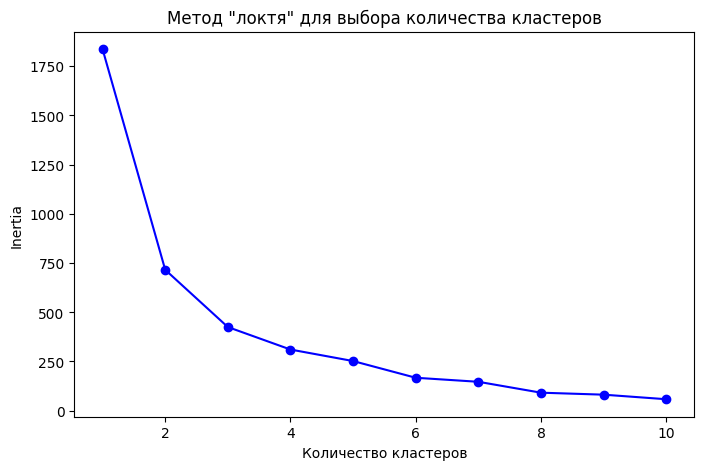

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\3864675335.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newborn_data_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


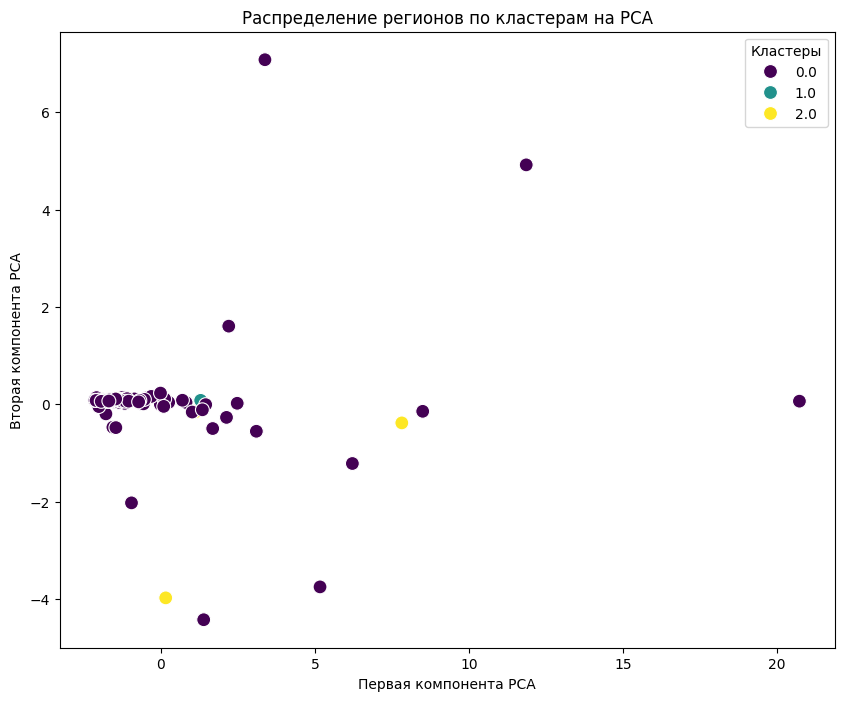

Регионы в кластерах 1:
['Центральный федеральный округ', 'Приволжский федеральный округ']
Регионы в кластерах 2:
['Город Москва столица Российской Федерации город федерального значения', 'Северо-Западный федеральный округ', 'Северо-Кавказский федеральный округ', 'Уральский федеральный округ', 'Сибирский федеральный округ']


In [353]:
newborn_data_filtered = newborn_data_cleaned_sums[newborn_data_cleaned_sums['Регион'] != 'Российская Федерация']

# Assuming newborn_data_filtered is already defined and cleaned

# Проверяем на наличие NaN значений в числовых колонках
print(newborn_data_filtered.isnull().sum())

# Преобразуем все числовые колонки в формат float (кроме колонки 'Регион')
newborn_data_filtered.iloc[:, 1:] = newborn_data_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Создаем колонку 'Среднее' как среднее значение по годам (2006-2022)
newborn_data_filtered['Среднее'] = newborn_data_filtered.iloc[:, 1:18].mean(axis=1)

# Масштабируем данные (кроме столбца с регионами и 'Среднее')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(newborn_data_filtered.drop(['Регион', 'Среднее'], axis=1))

# Применяем метод локтя для определения оптимального количества кластеров
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Построим график метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод "локтя" для выбора количества кластеров')
plt.show()

# Выбираем 3 кластера (по результатам анализа локтя)
kmeans = KMeans(n_clusters=3, random_state=42)
newborn_data_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Применяем PCA для уменьшения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создаем DataFrame для упрощения визуализации
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = newborn_data_filtered['Cluster']
df_pca['Регион'] = newborn_data_filtered['Регион']

# Визуализируем
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Распределение регионов по кластерам на PCA')
plt.xlabel('Первая компонента PCA')
plt.ylabel('Вторая компонента PCA')
plt.legend(title='Кластеры')
plt.show()
# Подсчет количества регионов в каждом кластере
cluster_counts = newborn_data_filtered['Cluster'].value_counts()

# Группируем по кластерам и собираем названия регионов в списки
cluster_regions = newborn_data_filtered[['Регион', 'Cluster']].groupby('Cluster')['Регион'].apply(list).reset_index()
# Фильтруем регионы для кластеров 1
regions_in_clusters_1 = newborn_data_filtered[newborn_data_filtered['Cluster'].isin([1])]

# Получаем список названий регионов для кластеров 1
regions_list_1 = regions_in_clusters_1['Регион'].tolist()

# Печатаем названия регионов
print("Регионы в кластерах 1:")
print(regions_list_1)
regions_in_clusters_2 = newborn_data_filtered[newborn_data_filtered['Cluster'].isin([2])]

# Получаем список названий регионов для кластеров 1
regions_list_2 = regions_in_clusters_2['Регион'].tolist()

# Печатаем названия регионов
print("Регионы в кластерах 2:")
print(regions_list_2)




### Выводы:
По количеству новорожденных самыми проблемными можно выделить регионы из кластера 1: Центральный федеральный окру и Приволжский Федеральный округ.

### 4. Уровень бедности по регионам

In [354]:
#display(poverty_procent_by_regions_1992_2020)
# Переименование колонки 'region' на 'Регион'
poverty_procent_by_regions_1992_2020.rename(columns={'region': 'Регион'}, inplace=True)
poverty_procent_by_regions_1992_2020.rename(columns={'year': 'Год'}, inplace=True)
# Приведение названий регионов к стандартному формату
poverty_procent_by_regions_1992_2020['Регион'] = poverty_procent_by_regions_1992_2020['Регион'].replace(region_mapping)

# Проверка уникальных значений регионов после обработки
unique_values_after_mapping = poverty_procent_by_regions_1992_2020['Регион'].unique()
#print("Уникальные регионы после обработки:", unique_values_after_mapping)


C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\4110532007.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_high_poverty, x='poverty_percent', y='Регион', palette='Reds')


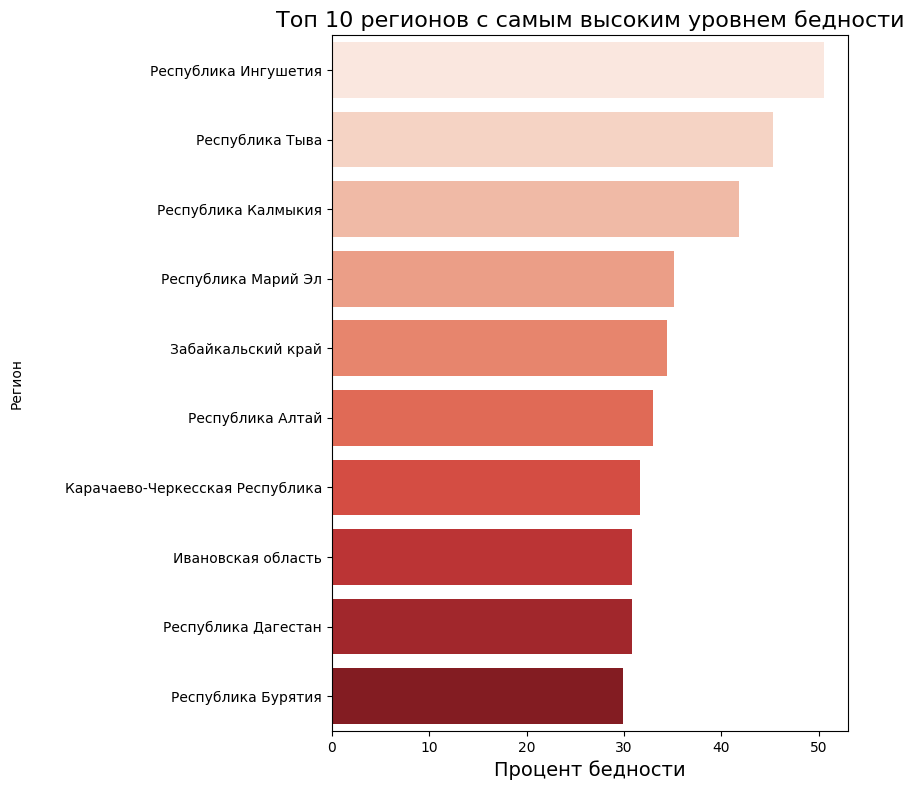

In [386]:
# Убедитесь, что 'poverty_percent' является числовым типом
poverty_procent_by_regions_1992_2020['poverty_percent'] = poverty_procent_by_regions_1992_2020['poverty_percent'].astype(float)

# Получение среднего уровня бедности по регионам
average_poverty = poverty_procent_by_regions_1992_2020.groupby('Регион')['poverty_percent'].mean().reset_index()

# Топ 10 регионов с самым высоким уровнем бедности
top_10_high_poverty = average_poverty.nlargest(10, 'poverty_percent')

# Топ 10 регионов с самым низким уровнем бедности
top_10_low_poverty = average_poverty.nsmallest(10, 'poverty_percent')

# Визуализация
plt.figure(figsize=(14, 8))

# Визуализация топ 10 с высоким уровнем бедности
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_high_poverty, x='poverty_percent', y='Регион', palette='Reds')
plt.title('Топ 10 регионов с самым высоким уровнем бедности', fontsize=16)
plt.xlabel('Процент бедности', fontsize=14)

plt.tight_layout()
plt.show()



### Выводы 
Регионы с самым большим процентом бедности на графике выше, лидер Республика Ингушетия.

### 5. Уровень производства в регионах

In [356]:
#display(regional_production_2005_2016)
#display(regional_production_2017_2020)
# Объединение датафреймов по столбцам 'region' и 'production_field'
merged_data_regional_production_2005_2020 = pd.merge(regional_production_2005_2016, regional_production_2017_2020, 
                        on=['region', 'production_field'], 
                        how='outer')  # Используем 'outer', чтобы сохранить все данные

# Печать структуры объединенного датафрейма
#print(merged_data_regional_production_2005_2020.info())
# Переименование колонки 'region' на 'Регион'
merged_data_regional_production_2005_2020.rename(columns={'region': 'Регион'}, inplace=True)

# Проверка изменений
#print(merged_data_regional_production_2005_2020.head())
# Используем melt для преобразования столбцов с годами в одну колонку
merged_data_regional_production_2005_2020_melted = merged_data_regional_production_2005_2020.melt(
    id_vars=['Регион', 'production_field'],  # Оставляем 'Регион' и 'production_field' как фиксированные колонки
    var_name='Год',  # Имя новой колонки для годов
    value_name='Значение'  # Имя новой колонки для значений
)

# Преобразуем значения в колонке 'Год' в целочисленный формат
merged_data_regional_production_2005_2020_melted['Год'] = merged_data_regional_production_2005_2020_melted['Год'].astype(int)

# Печать уникальных значений
#print(unique_values)
# Приведение столбца 'Регион' к нижнему регистру и удаление лишних пробелов
merged_data_regional_production_2005_2020_melted['Регион'] = merged_data_regional_production_2005_2020_melted['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
merged_data_regional_production_2005_2020_melted['Регион'] = merged_data_regional_production_2005_2020_melted['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
merged_data_regional_production_2005_2020_melted['Регион'] = merged_data_regional_production_2005_2020_melted['Регион'].apply(lambda x: x.title())

# Проверка результата
print(merged_data_regional_production_2005_2020_melted['Регион'].unique())
# Удаление дубликатов
merged_data_regional_production_2005_2020_melted.drop_duplicates(inplace=True)

# Удаление пустых строк
merged_data_regional_production_2005_2020_melted.dropna(how='all', inplace=True)

# Удаление пустых столбцов
merged_data_regional_production_2005_2020_melted.dropna(axis=1, how='all', inplace=True)
# Удаление строк, где менее 50% данных
threshold = len(merged_data_regional_production_2005_2020_melted.columns) * 0.9
merged_data_regional_production_2005_2020_melted.dropna(thresh=threshold, inplace=True)

# Проверка результата после удаления
print(merged_data_regional_production_2005_2020_melted.info())
merged_data_regional_production_2005_2020_melted = merged_data_regional_production_2005_2020_melted.drop(columns=['production_field'])
display(merged_data_regional_production_2005_2020_melted.head())



['Агинский Бурятский Округ (Забайкальский Край)'
 'Архангельская Область (Без Ао)'
 'Архангельская Область (Кроме Ненецкого Автономного Округа)'
 'Коми-Пермяцкий Округ, Входящий В Состав Пермского Края'
 'Корякский Округ, Входящий В Состав Камчатского Края'
 'Ненецкий Автономный Округ (Архангельская Область)'
 'Таймырский (Долгано-Ненецкий) Автономный Округ (Красноярский Край)'
 'Тюменская Область (Без Ао)'
 'Тюменская Область (Кроме Ханты-Мансийского Автономного Округа-Югры И Ямало-Ненецкого Автономного Округа)'
 'Усть-Ордынский Бурятский Округ'
 'Ханты-Мансийский Автономный Округ - Югра (Тюменская Область)'
 'Эвенкийский Автономный Округ (Красноярский Край)'
 'Ямало-Ненецкий Автономный Округ (Тюменская Область)' 'Алтайский Край'
 'Амурская Область' 'Архангельская Область' 'Астраханская Область'
 'Белгородская Область' 'Брянская Область' 'Владимирская Область'
 'Волгоградская Область' 'Вологодская Область' 'Воронежская Область'
 'Город Москва Столица Российской Федерации Город Федерал

Регион   Год   Значение
0       Агинский Бурятский Округ (Забайкальский Край)  2005 121,047.20
1       Агинский Бурятский Округ (Забайкальский Край)  2005 147,423.80
2       Агинский Бурятский Округ (Забайкальский Край)  2005  58,537.90
14  Коми-Пермяцкий Округ, Входящий В Состав Пермск...  2005 263,100.90
15  Коми-Пермяцкий Округ, Входящий В Состав Пермск...  2005 191,471.80

In [357]:
# Группировка данных по регионам и суммирование значений производства
production_by_region = merged_data_regional_production_2005_2020_melted.groupby('Регион')['Значение'].sum().reset_index()

# Топ-10 регионов с самым большим производством
top_10_highest = production_by_region.nlargest(10, 'Значение')

# Топ-10 регионов с самым маленьким производством
top_10_lowest = production_by_region.nsmallest(10, 'Значение')

# Округление значений и преобразование в удобный формат
top_10_highest['Значение'] = top_10_highest['Значение'].apply(lambda x: round(x, 2))
top_10_lowest['Значение'] = top_10_lowest['Значение'].apply(lambda x: round(x, 2))
# Установка формата отображения чисел
pd.options.display.float_format = '{:,.2f}'.format
def format_large_number(num):
    if num >= 1_000_000_000_000:
        return f'{num / 1_000_000_000_000:.2f} трлн'
    elif num >= 1_000_000_000:
        return f'{num / 1_000_000_000:.2f} млрд'
    elif num >= 1_000_000:
        return f'{num / 1_000_000:.2f} млн'
    else:
        return f'{num:.2f}'

# Применение функции к значениям
top_10_highest['Значение'] = top_10_highest['Значение'].apply(format_large_number)
top_10_lowest['Значение'] = top_10_lowest['Значение'].apply(format_large_number)

# Вывод результатов
print("Топ-10 регионов с самым большим производством:")
print(top_10_highest[['Регион', 'Значение']])

print("\nТоп-10 регионов с самым маленьким производством:")
print(top_10_lowest[['Регион', 'Значение']])


Топ-10 регионов с самым большим производством:
                                               Регион     Значение
72                               Российская Федерация    2.29 трлн
98                      Центральный Федеральный Округ  476.17 млрд
52                      Приволжский Федеральный Округ  347.09 млрд
94                        Уральский Федеральный Округ  338.58 млрд
79                  Северо-Западный Федеральный Округ  210.14 млрд
81                        Сибирский Федеральный Округ  204.93 млрд
13  Город Москва Столица Российской Федерации Горо...  119.24 млрд
89                                  Тюменская Область  111.34 млрд
16                  Дальневосточный Федеральный Округ   82.53 млрд
97  Ханты-Мансийский Автономный Округ - Югра (Тюме...   62.51 млрд

Топ-10 регионов с самым маленьким производством:
                                                Регион    Значение
28   Коми-Пермяцкий Округ, Входящий В Состав Пермск...   454572.70
95                      Усть-Орд

### Выводы: 
Регионы где сосредоточено больше всего производств:
Центральный Федеральный Округ, Приволжский Федеральный Округ, Уральский Федеральный Округ. 
Регионы с самыми низкими объемами производства:
Коми-Пермяцкий Округ, Усть-Ордынский Бурятский Округ, Эвенкийский Автономный Округ.


### 6. Доходы населения

In [358]:
#display(cash_real_income_wages_2015_2020)
# Переименование колонки 'region' на 'Регион'
cash_real_income_wages_2015_2020.rename(columns={'region': 'Регион'}, inplace=True)

# Преобразование данных с помощью pd.melt
cash_real_income_wages_2015_2020_melted = pd.melt(
    cash_real_income_wages_2015_2020,
    id_vars=['Регион'],  # Идентифицирующая переменная
    var_name='Год',  # Имя новой колонки с годами
    value_name='Значение'  # Имя новой колонки с значениями
)

cash_real_income_wages_2015_2020_melted['Регион'] = cash_real_income_wages_2015_2020_melted['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
cash_real_income_wages_2015_2020_melted['Регион'] = cash_real_income_wages_2015_2020_melted['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
cash_real_income_wages_2015_2020_melted['Регион'] = cash_real_income_wages_2015_2020_melted['Регион'].apply(lambda x: x.title())

# Проверка результата
#print(cash_real_income_wages_2015_2020_melted['Регион'].unique())


In [359]:
# Удаление дубликатов
cash_real_income_wages_2015_2020_melted.drop_duplicates(inplace=True)

# Проверка и удаление строк с пропусками
# Можно выбрать удаление всех строк с любыми пропусками или только в определенных столбцах
cash_real_income_wages_2015_2020_melted.dropna(inplace=True)  # Удаляет строки с любыми пропусками
# cash_real_income_wages_2015_2020_melted.dropna(subset=['Регион', 'Год', 'Значение'], inplace=True)  # Удаляет строки с пропусками только в указанных столбцах

# Приведение типов данных (например, Год может быть строкой, нужно привести к int)
cash_real_income_wages_2015_2020_melted['Год'] = cash_real_income_wages_2015_2020_melted['Год'].astype(int)

# Проверка уникальности значений в столбцах
#print("Уникальные регионы:", cash_real_income_wages_2015_2020_melted['Регион'].unique())
#print("Уникальные годы:", cash_real_income_wages_2015_2020_melted['Год'].unique())

# Проверка на наличие дубликатов и пропусков после очистки
print("Количество строк после очистки:", cash_real_income_wages_2015_2020_melted.shape[0])
print("Количество пропусков:", cash_real_income_wages_2015_2020_melted.isnull().sum().sum())
# Вычисление IQR для определения выбросов
Q1 = cash_real_income_wages_2015_2020_melted['Значение'].quantile(0.25)
Q3 = cash_real_income_wages_2015_2020_melted['Значение'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
cash_real_income_wages_2015_2020_melted = cash_real_income_wages_2015_2020_melted[
    (cash_real_income_wages_2015_2020_melted['Значение'] >= lower_bound) & 
    (cash_real_income_wages_2015_2020_melted['Значение'] <= upper_bound)
]

# Проверка количества строк после удаления выбросов
print("Количество строк после удаления выбросов:", cash_real_income_wages_2015_2020_melted.shape[0])


# Группировка по регионам и вычисление средних значений доходов по годам
average_income = cash_real_income_wages_2015_2020_melted.groupby(['Регион', 'Год'])['Значение'].mean().unstack()

# Вычисление темпа роста с 2015 года
average_income['Темп роста'] = (average_income[2020] - average_income[2015]) / average_income[2015] * 100

# Сортировка по темпу роста и выбор ТОП-10 регионов с наименьшими значениями
top_10_low_growth = average_income.nsmallest(10, 'Темп роста')

# Проверка результата
print(top_10_low_growth[['Темп роста']])


Количество строк после очистки: 576
Количество пропусков: 0
Количество строк после удаления выбросов: 521
Год                               Темп роста
Регион                                      
Пермский Край                          -4.40
Новгородская Область                    2.49
Республика Дагестан                     3.35
Удмуртская Республика                   4.92
Астраханская Область                    5.74
Карачаево-Черкесская\nРеспублика        6.40
Самарская Область                       7.09
Томская Область                         7.57
Курганская Область                      7.63
Оренбургская Область                    7.74


### Выводы
По темпам роста самым критичным является Пермский край, где тенденция не положиотельная. 
Новгородская Область низкий тем роста 
Республика Дагестан тоже очень низкий темп роста. 

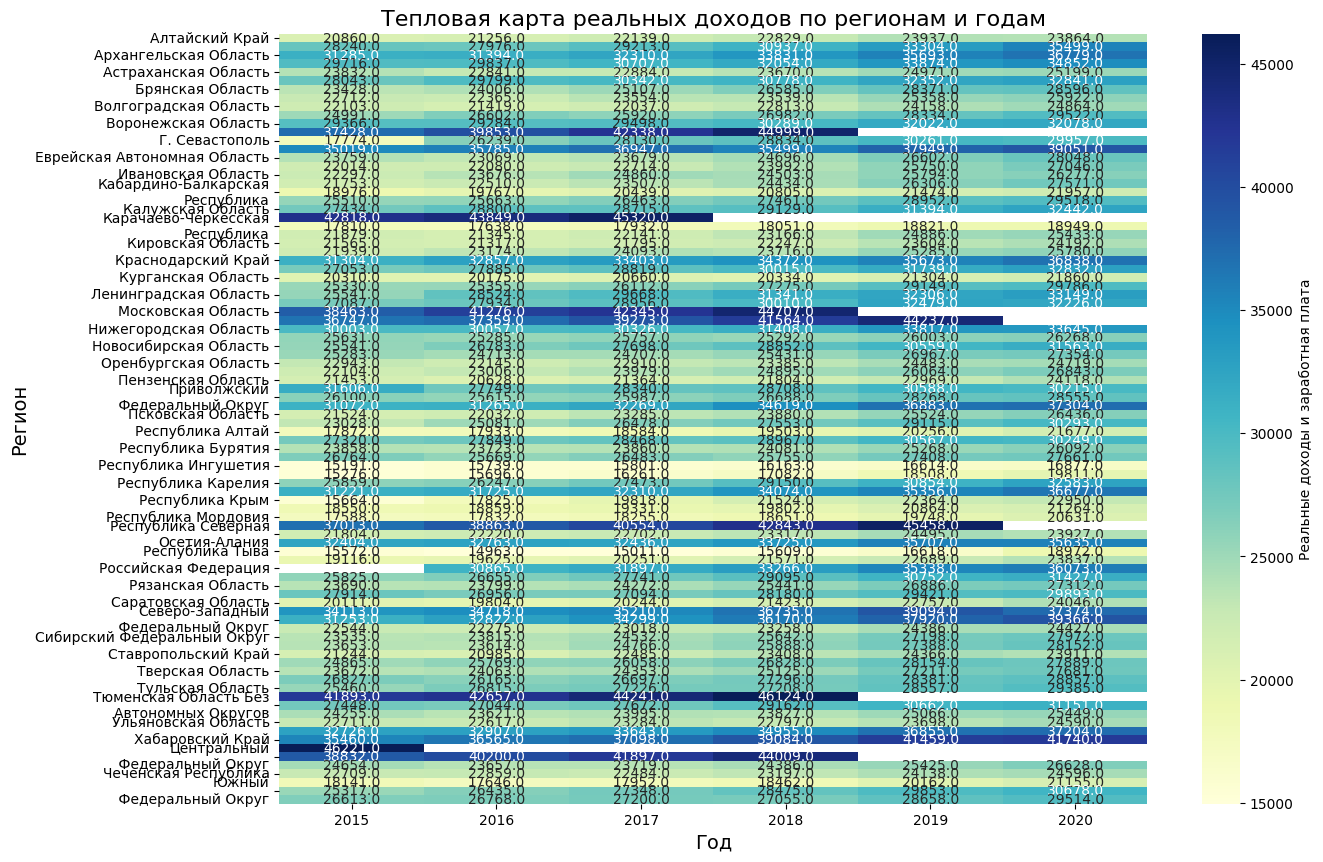

In [360]:
# Создание сводной таблицы для тепловой карты
pivot_table = cash_real_income_wages_2015_2020_melted.pivot_table(index='Регион', columns='Год', values='Значение')

# Создание тепловой карты
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Реальные доходы и заработная плата'})
plt.title('Тепловая карта реальных доходов по регионам и годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.show()


### Выводы
По тепловой карте можно увидеть, что на территории Российской Федерации в основном ниже средних по стране показателей. 

### 7. Детская смертность

In [361]:
# Проверка названий колонок в обоих датафреймах
#print("child_mortality_rural_1990_2021 колонки:", child_mortality_rural_1990_2021.columns)
#print("child_mortality_urban_1990_2021 колонки:", child_mortality_urban_1990_2021.columns)

# Переименование первой колонки в обоих датафреймах
child_mortality_rural_1990_2021.rename(columns={child_mortality_rural_1990_2021.columns[0]: 'Регион'}, inplace=True)
child_mortality_urban_1990_2021.rename(columns={child_mortality_urban_1990_2021.columns[0]: 'Регион'}, inplace=True)

# Проверка изменений
print("child_mortality_rural_1990_2021 колонки после переименования:", child_mortality_rural_1990_2021.columns)
print("child_mortality_urban_1990_2021 колонки после переименования:", child_mortality_urban_1990_2021.columns)

# Генерация новых названий для колонок начиная с 3-й
years = [str(year) for year in range(1990, 2022)]  # Предполагаем, что до 2021 года

# Обновление колонок для rural
new_columns_rural = ['Регион', 'Unnamed: 1', 'Unnamed: 2'] + years
child_mortality_rural_1990_2021.columns = new_columns_rural

# Обновление колонок для urban
new_columns_urban = ['Регион', 'Unnamed: 1', 'Unnamed: 2'] + years
child_mortality_urban_1990_2021.columns = new_columns_urban

# Проверка изменений
print("child_mortality_rural_1990_2021 колонки после обновления:", child_mortality_rural_1990_2021.columns)
print("child_mortality_urban_1990_2021 колонки после обновления:", child_mortality_urban_1990_2021.columns)

# Кодируем значения в колонке 'Unnamed: 2'
child_mortality_rural_1990_2021['Unnamed: 2'] = child_mortality_rural_1990_2021['Unnamed: 2'].replace({'сельское население': 1})
child_mortality_urban_1990_2021['Unnamed: 2'] = child_mortality_urban_1990_2021['Unnamed: 2'].replace({'городское население': 0})

# Переименование колонки 'Unnamed: 2' в 'Местность'
child_mortality_rural_1990_2021.rename(columns={'Unnamed: 2': 'Местность'}, inplace=True)
child_mortality_urban_1990_2021.rename(columns={'Unnamed: 2': 'Местность'}, inplace=True)

# Удаление колонки 'Unnamed: 1'
child_mortality_rural_1990_2021.drop(columns=['Unnamed: 1'], inplace=True)
child_mortality_urban_1990_2021.drop(columns=['Unnamed: 1'], inplace=True)

# Проверка изменений
#display(child_mortality_rural_1990_2021.head())
#display(child_mortality_urban_1990_2021.head())


child_mortality_rural_1990_2021 колонки после переименования: Index(['Регион', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34'],
      dtype='object')
child_mortality_urban_1990_2021 колонки после переименования: Index(['Регион', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\714915926.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  child_mortality_rural_1990_2021['Unnamed: 2'] = child_mortality_rural_1990_2021['Unnamed: 2'].replace({'сельское население': 1})
C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\714915926.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  child_mortality_urban_1990_2021['Unnamed: 2'] = child_mortality_urban_1990_2021['Unnamed: 2'].replace({'городское население': 0})


In [362]:
# Убедимся, что в данных нет пропусков по региону и местности
print(child_mortality_rural_1990_2021[['Регион', 'Местность']].isnull().sum())
print(child_mortality_urban_1990_2021[['Регион', 'Местность']].isnull().sum())

# Проверка названий колонок, чтобы убедиться, что нет дублирования или ошибок
print("Колонки в child_mortality_rural_1990_2021:", child_mortality_rural_1990_2021.columns)
print("Колонки в child_mortality_urban_1990_2021:", child_mortality_urban_1990_2021.columns)

# Объединение по региону и местности
child_mortality_combined_1990_2021 = pd.merge(
    child_mortality_rural_1990_2021,
    child_mortality_urban_1990_2021,
    on=['Регион', 'Местность'],  # Объединяем по Региону и Местности
    suffixes=('_rural', '_urban'),  # Добавляем суффиксы для различения сельской и городской местности
    how='outer'  # Используем outer, чтобы не потерять данные
)

# Убедимся, что дубликаты для каждого года соответствуют нужным значениям (используем сельские значения)
for year in range(1990, 2022):
    if f'{year}_urban' in child_mortality_combined_1990_2021.columns:
        child_mortality_combined_1990_2021[year] = child_mortality_combined_1990_2021[f'{year}_rural'].combine_first(
            child_mortality_combined_1990_2021[f'{year}_urban'])

# Удаляем дублирующие колонки
child_mortality_combined_1990_2021.drop(columns=[f'{year}_rural' for year in range(1990, 2022)], inplace=True)
child_mortality_combined_1990_2021.drop(columns=[f'{year}_urban' for year in range(1990, 2022)], inplace=True)

# Преобразование данных с помощью pd.melt
child_mortality_combined_melted = pd.melt(
    child_mortality_combined_1990_2021,
    id_vars=['Регион', 'Местность'],  # Оставляем идентифицирующие колонки
    var_name='Год',  # Имя новой колонки для лет
    value_name='Детская смертность'  # Имя колонки для значений детской смертности
)

# Преобразуем колонку 'Год' в числовой формат
child_mortality_combined_melted['Год'] = pd.to_numeric(child_mortality_combined_melted['Год'], errors='coerce')

# Проверка результатов
print(child_mortality_combined_melted.head())


Регион       2
Местность    2
dtype: int64
Регион       2
Местность    2
dtype: int64
Колонки в child_mortality_rural_1990_2021: Index(['Регион', 'Местность', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')
Колонки в child_mortality_urban_1990_2021: Index(['Регион', 'Местность', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')
                                              Регион  Местность   Год  \
0              Агинский Бурятский округ (Забайкал...       0.00  1990   
1              Агински

In [363]:
# Приведение всех значений в колонке 'Регион' к строковому типу, обработка пропущенных значений
child_mortality_combined_melted['Регион'] = child_mortality_combined_melted['Регион'].astype(str)

# Приведение названий регионов к правильному формату (с заглавной буквы)
child_mortality_combined_melted['Регион'] = child_mortality_combined_melted['Регион'].apply(lambda x: x.title() if x != 'nan' else x)

#Приводим названия регионов к стандарту
child_mortality_combined_melted['Регион'] = child_mortality_combined_melted['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
child_mortality_combined_melted['Регион'] = child_mortality_combined_melted['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
child_mortality_combined_melted['Регион'] = child_mortality_combined_melted['Регион'].apply(lambda x: x.title())

# Проверка результата
print(child_mortality_combined_melted['Регион'].unique())

# Удаление дубликатов
child_mortality_combined_melted = child_mortality_combined_melted.drop_duplicates()

# Удаление пустых значений
child_mortality_combined_melted = child_mortality_combined_melted.dropna()

# Проверка результата
print(child_mortality_combined_melted.info())


['Агинский Бурятский Округ (Забайкальский Край)'
 'Архангельская Область (Кроме Ненецкого Автономного Округа)'
 'Коми-Пермяцкий Округ, Входящий В Состав Пермского Края'
 'Корякский Округ, Входящий В Состав Камчатского Края'
 'Ненецкий Автономный Округ (Архангельская Область)'
 'Таймырский (Долгано-Ненецкий) Автономный Округ (Красноярский Край)'
 'Тюменская Область (Кроме Ханты-Мансийского Автономного Округа-Югры И Ямало-Ненецкого Автономного Округа)'
 'Усть-Ордынский Бурятский Округ'
 'Ханты-Мансийский Автономный Округ - Югра (Тюменская Область)'
 'Эвенкийский Автономный Округ (Красноярский Край)'
 'Ямало-Ненецкий Автономный Округ (Тюменская Область)' 'Алтайский Край'
 'Амурская Область' 'Архангельская Область' 'Астраханская Область'
 'Белгородская Область' 'Брянская Область' 'Владимирская Область'
 'Волгоградская Область' 'Вологодская Область' 'Воронежская Область'
 'Город Москва Столица Российской Федерации Город Федерального Значения'
 'Город Санкт-Петербург Город Федерального Значе

In [364]:
# Удаляем строки с детской смертностью больше 100, так как это аномальные значения
child_mortality_cleaned = child_mortality_combined_melted[child_mortality_combined_melted['Детская смертность'] <= 1000]

# Также удалим строки, где есть пропуски в колонках "Регион" или "Детская смертность"
child_mortality_cleaned = child_mortality_cleaned.dropna(subset=['Регион', 'Детская смертность'])

# Проверим, что больше нет аномальных значений
print(child_mortality_cleaned['Детская смертность'].describe())


count   5,946.00
mean      130.46
std       170.34
min         0.00
25%        31.00
50%        68.00
75%       149.00
max       995.00
Name: Детская смертность, dtype: float64


In [365]:
# Фильтрация данных по сельской местности (местность = 1)
rural_data = child_mortality_combined_melted[child_mortality_combined_melted['Местность'] == 1]

# Фильтрация данных по городской местности (местность = 0)
urban_data = child_mortality_combined_melted[child_mortality_combined_melted['Местность'] == 0]

# Функция для расчета темпа снижения с обработкой деления на ноль
def calculate_rate_of_decrease(group):
    initial_mortality = group[group['Год'] == group['Год'].min()]['Детская смертность'].values[0]
    final_mortality = group[group['Год'] == group['Год'].max()]['Детская смертность'].values[0]
    
    if initial_mortality == 0:
        return float('nan')  # Если начальная смертность равна 0, возвращаем NaN
    else:
        return (initial_mortality - final_mortality) / initial_mortality

# Расчет темпов снижения для сельской местности
rural_rate_of_decrease = rural_data.groupby('Регион').apply(calculate_rate_of_decrease).reset_index(name='Темп снижения')

# Убираем регионы с NaN и сортируем по темпам снижения
top_10_rural_lowest = rural_rate_of_decrease.dropna().sort_values(by='Темп снижения', ascending=True).head(10)

# Расчет темпов снижения для городской местности
urban_rate_of_decrease = urban_data.groupby('Регион').apply(calculate_rate_of_decrease).reset_index(name='Темп снижения')

# Убираем регионы с NaN и сортируем по темпам снижения
top_10_urban_lowest = urban_rate_of_decrease.dropna().sort_values(by='Темп снижения', ascending=True).head(10)

# Вывод топ 10 регионов для сельской местности с наименьшими темпами снижения
print("Топ 10 регионов с самыми низкими темпами снижения смертности в сельской местности:")
print(top_10_rural_lowest)

# Вывод топ 10 регионов для городской местности с наименьшими темпами снижения
print("Топ 10 регионов с самыми низкими темпами снижения смертности в городской местности:")
print(top_10_urban_lowest)



C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\2535644912.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rural_rate_of_decrease = rural_data.groupby('Регион').apply(calculate_rate_of_decrease).reset_index(name='Темп снижения')


Топ 10 регионов с самыми низкими темпами снижения смертности в сельской местности:
                                                Регион  Темп снижения
32   Корякский Округ, Входящий В Состав Камчатского...          -0.40
36                          Крымский Федеральный Округ           0.00
31   Коми-Пермяцкий Округ, Входящий В Состав Пермск...           0.00
107                   Чеченская И Ингушская Республики           0.23
114             Южный Федеральный Округ (С 29.07.2016)           0.33
98                                     Уральский Район           0.40
21                             Западно-Сибирский Район           0.41
66                                     Республика Крым           0.42
112              Южный Федеральный Округ (По 2009 Год)           0.45
53                                    Поволжский Район           0.45
Топ 10 регионов с самыми низкими темпами снижения смертности в городской местности:
                                      Регион  Темп снижения
107

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\2535644912.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  urban_rate_of_decrease = urban_data.groupby('Регион').apply(calculate_rate_of_decrease).reset_index(name='Темп снижения')


### Выводы
В сельской местности проблемные регионы с самыми низкими темпами снижения скоорости детской смертности являются:
Корякский Округ - там увеличивается тем детской смертности. 
Крымский Округ и Коми-Пермяцкий Округ - нейтральная тенденция
Чеченская и Ингушская республика - очень слабые темпы снижения
В городской местности: 
Чеченская И Ингушская Республики - увеличиваются темпы роста детской смертности
Крымский Федеральный Округ - нейтральная тенденция
Город Федерального Значения Севастополь - слабые темпы снижения детской смертности


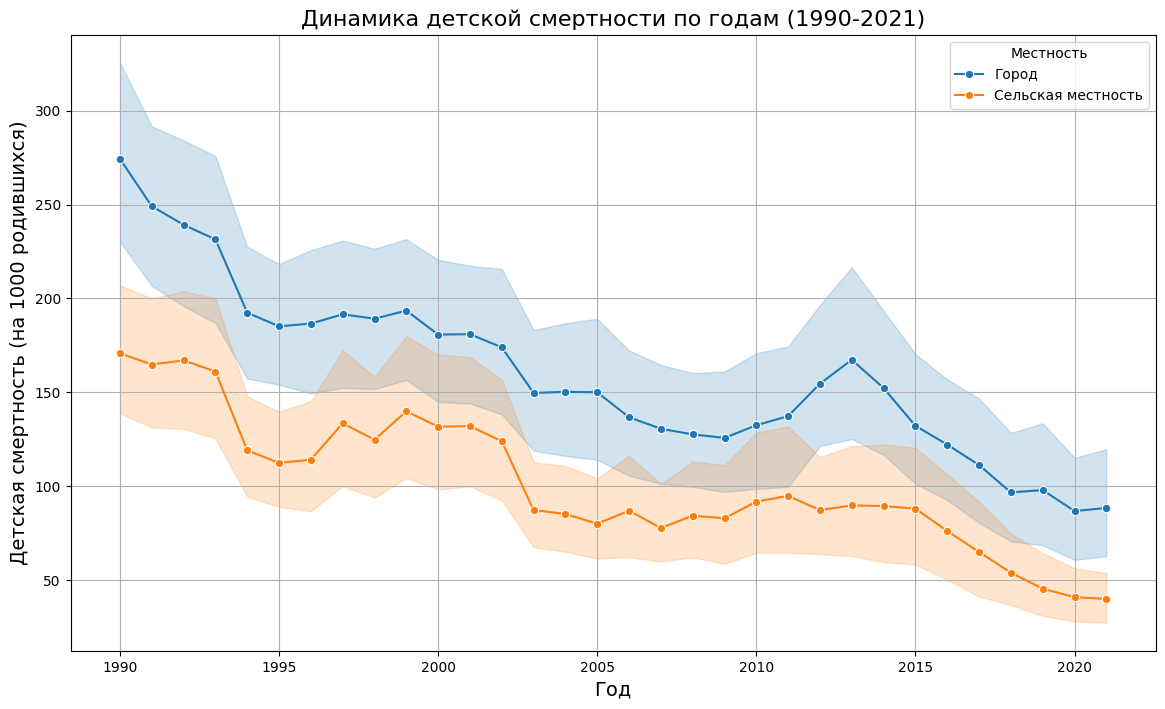

In [366]:
# Заменяем значения 0 и 1 на 'Город' и 'Сельская местность'
child_mortality_cleaned['Местность'] = child_mortality_cleaned['Местность'].replace({0: 'Город', 1: 'Сельская местность'})

# Убедимся, что 'Год' является числовым типом
child_mortality_cleaned['Год'] = child_mortality_cleaned['Год'].astype(int)

# Построение графика
plt.figure(figsize=(14, 8))
sns.lineplot(data=child_mortality_cleaned, x='Год', y='Детская смертность', hue='Местность', marker='o')
plt.title('Динамика детской смертности по годам (1990-2021)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Детская смертность (на 1000 родившихся)', fontsize=14)
plt.legend(title='Местность', loc='upper right')
plt.grid()
plt.show()



### Выводы общие
И в сельской и в городской местности темпы роста детской смертности снижаются. 

### 8. Случаи алкогольных и наркотических зависимостей по регионам

In [367]:
#display(drug_alco)
# Переименование колонки 'region' на 'Регион'
drug_alco.rename(columns={'region': 'Регион'}, inplace=True)

# Преобразование данных с помощью pd.melt
drug_alco_melted = pd.melt(
    drug_alco,
    id_vars=['Регион'],  # Идентифицирующая переменная
    var_name='Год',  # Имя новой колонки с годами
    value_name='Значение'  # Имя новой колонки с значениями
)
#Приводим названия регионов к стандарту
drug_alco_melted['Регион'] = drug_alco_melted['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
drug_alco_melted['Регион'] = drug_alco_melted['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
drug_alco_melted['Регион'] = drug_alco_melted['Регион'].apply(lambda x: x.title())
#print(drug_alco_melted['Регион'].unique())
# Удаление дубликатов
drug_alco_melted.drop_duplicates(inplace=True)

# Проверка на пропуски в данных
print("Пропуски в данных:")
print(drug_alco_melted.isnull().sum())

# Обработка пропусков в столбце 'Значение' (например, можно удалить строки с пропусками или заменить на 0)
drug_alco_melted.dropna(subset=['Значение'], inplace=True)

# Преобразование столбца 'Значение' в числовой тип данных для проверки аномалий
drug_alco_melted['Значение'] = pd.to_numeric(drug_alco_melted['Значение'], errors='coerce')

# Проверка на отрицательные или аномально высокие значения
# Например, если значения должны быть положительными:
print("Аномальные значения (отрицательные):")
print(drug_alco_melted[drug_alco_melted['Значение'] < 0])

# Опционально: можно удалить строки с отрицательными значениями
drug_alco_melted = drug_alco_melted[drug_alco_melted['Значение'] >= 0]

# Проверка аномально высоких значений (например, если значения не должны превышать 1000)
#print("Аномальные значения (слишком высокие):")
#print(drug_alco_melted[drug_alco_melted['Значение'] > 1000])

# Опционально: можно удалить строки с слишком высокими значениями
drug_alco_melted = drug_alco_melted[drug_alco_melted['Значение'] <= 1000]

# Проверка результата очистки
#print("Данные после очистки:")
#print(drug_alco_melted.info())



Пропуски в данных:
Регион       0
Год          0
Значение    51
dtype: int64
Аномальные значения (отрицательные):
Empty DataFrame
Columns: [Регион, Год, Значение]
Index: []


In [368]:
# Преобразование данных для расчета темпов изменения
drug_alco_melted['Год'] = pd.to_numeric(drug_alco_melted['Год'], errors='coerce')

# Функция для расчета темпа снижения
def calculate_rate_of_decrease(group):
    initial_value = group[group['Год'] == group['Год'].min()]['Значение'].values[0]
    final_value = group[group['Год'] == group['Год'].max()]['Значение'].values[0]
    
    if initial_value == 0:
        return float('nan')  # Если начальное значение равно 0, возвращаем NaN
    else:
        return (initial_value - final_value) / initial_value

# Группировка данных по регионам и расчет темпов снижения
rate_of_decrease = drug_alco_melted.groupby('Регион').apply(calculate_rate_of_decrease).reset_index(name='Темп снижения')

# Убираем регионы с NaN и сортируем по темпам снижения
rate_of_decrease_clean = rate_of_decrease.dropna().sort_values(by='Темп снижения', ascending=True)

# Топ 10 регионов с самыми медленными темпами снижения (или наибольшими темпами роста)
top_10_slowest_decrease = rate_of_decrease_clean.head(10)

# Вывод топ 10 регионов
print("Топ 10 регионов с самыми медленными темпами снижения случаев алкоголя и наркотиков:")
print(top_10_slowest_decrease)


Топ 10 регионов с самыми медленными темпами снижения случаев алкоголя и наркотиков:
                                        Регион  Темп снижения
16             Кабардино-Балкарская Республика           0.10
58           Республика Северная Осетия-Алания           0.11
12                Еврейская Автономная Область           0.18
82                            Хабаровский Край           0.23
40                           Орловская Область           0.25
49                          Республика Бурятия           0.29
17                     Калининградская Область           0.31
46  Республика Адыгея (Адыгея) (До 03.06.2014)           0.31
44                             Приморский Край           0.34
2                        Архангельская Область           0.35


C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\625333763.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rate_of_decrease = drug_alco_melted.groupby('Регион').apply(calculate_rate_of_decrease).reset_index(name='Темп снижения')


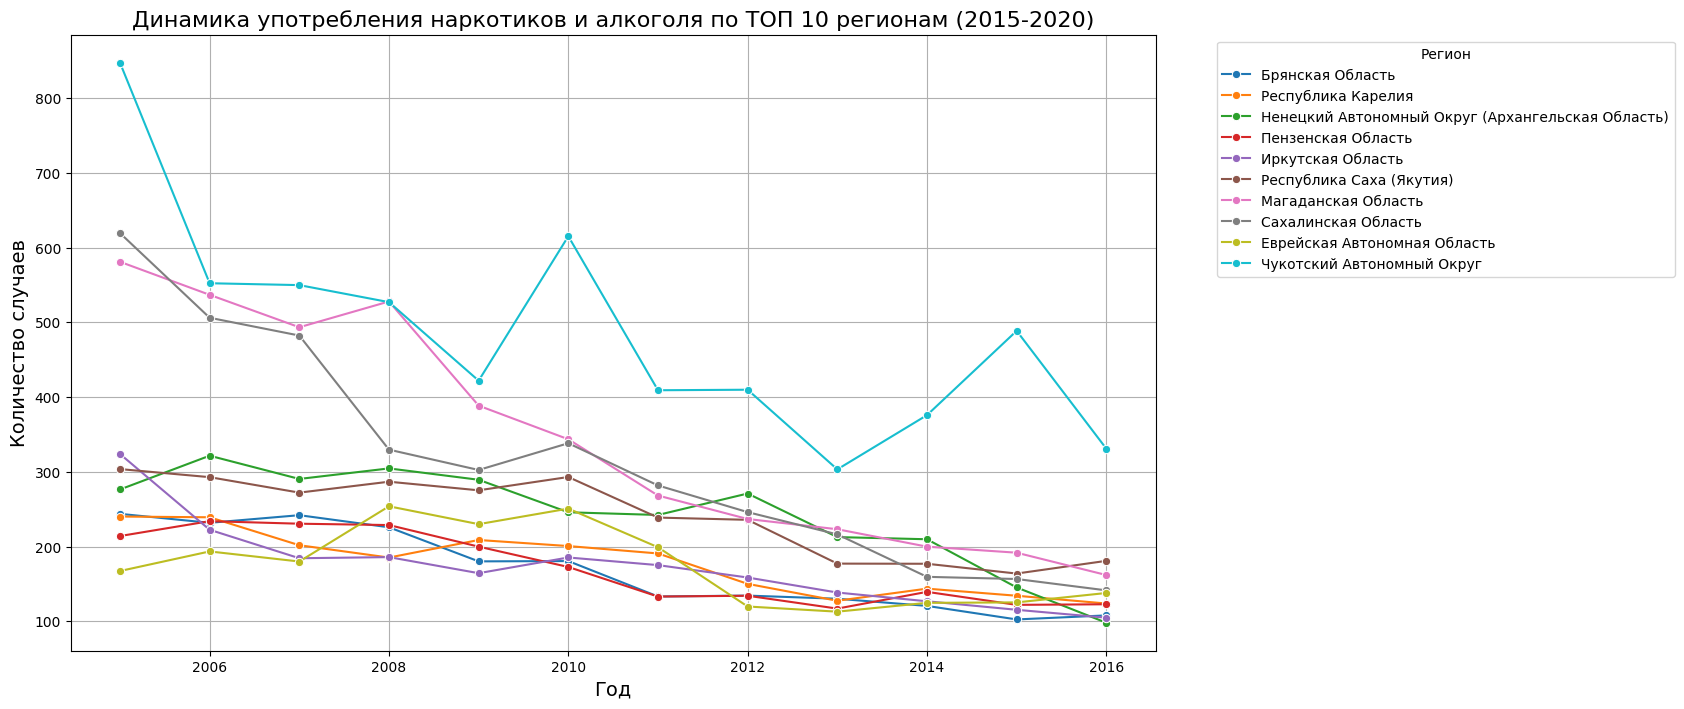

In [369]:
# Вычисление среднего значения для каждого региона
top_10_regions = drug_alco_melted.groupby('Регион')['Значение'].mean().nlargest(10).index

# Фильтрация данных для ТОП 10 регионов
top_10_data = drug_alco_melted[drug_alco_melted['Регион'].isin(top_10_regions)]

# Построение графика
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_10_data, x='Год', y='Значение', hue='Регион', marker='o')

# Оформление
plt.title('Динамика употребления наркотиков и алкоголя по ТОП 10 регионам (2015-2020)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество случаев', fontsize=14)
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Отображение графика
plt.show()




### Выводы
Количество случаев снижается во всех регионах.
Самый проблемынй регион Чукотский автонмный Округ - ситуация нестабильная. 

### 9. Домовладения. Уровень стесненности по регионам

In [370]:
#display(housing_2020)
#Приводим названия регионов к стандарту
housing_2020['Регион'] = housing_2020['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
housing_2020['Регион'] = housing_2020['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
housing_2020['Регион'] = housing_2020['Регион'].apply(lambda x: x.title())
# Удаление строк, где все значения пропущены (NaN)
housing_2020_cleaned = housing_2020.dropna(how='all')

# Заполнение пропусков в числовых столбцах средними значениями (по всей выборке)
numerical_columns = [
    'Число домохозяйств, проживающих во всех типах жилых помещений',
    'в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности',
    'в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность',
    'в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность',
    'затруднились ответить',
    'Размер общей площади в расчете на члена домохозяйства',
    'Размер жилой площади в расчете на члена домохозяйства',
    'Число жилых комнат в расчете на одно домохозяйство'
]

# Заполнение пропусков средними значениями по всей выборке
housing_2020_cleaned[numerical_columns] = housing_2020_cleaned[numerical_columns].fillna(housing_2020_cleaned[numerical_columns].mean())

# Проверка на отрицательные значения или аномалии
#print("Аномалии (отрицательные значения):")
#print(housing_2020_cleaned[housing_2020_cleaned[numerical_columns].lt(0).any(axis=1)])

# Удаление строк с отрицательными значениями
housing_2020_cleaned = housing_2020_cleaned[housing_2020_cleaned[numerical_columns].ge(0).all(axis=1)]

# Проверка аномально высоких значений (например, если площадь не должна превышать 1000 кв.м)
#print("Аномально высокие значения:")
#print(housing_2020_cleaned[housing_2020_cleaned['Размер общей площади в расчете на члена домохозяйства'] > 1000])

# Опционально: можно удалить строки с аномально высокими значениями
housing_2020_cleaned = housing_2020_cleaned[housing_2020_cleaned['Размер общей площади в расчете на члена домохозяйства'] <= 1000]
# Удаление строк, где все значения пропущены
housing_2020_cleaned = housing_2020.dropna(how='all')

# Удаление столбцов, где все значения пропущены
housing_2020_cleaned = housing_2020_cleaned.dropna(axis=1, how='all')

# Проверка результата
#print("Данные после удаления пустых строк и столбцов:")
#print(housing_2020_cleaned.info())

# Проверка результата
#print("Данные после очистки:")
#print(housing_2020_cleaned.info())



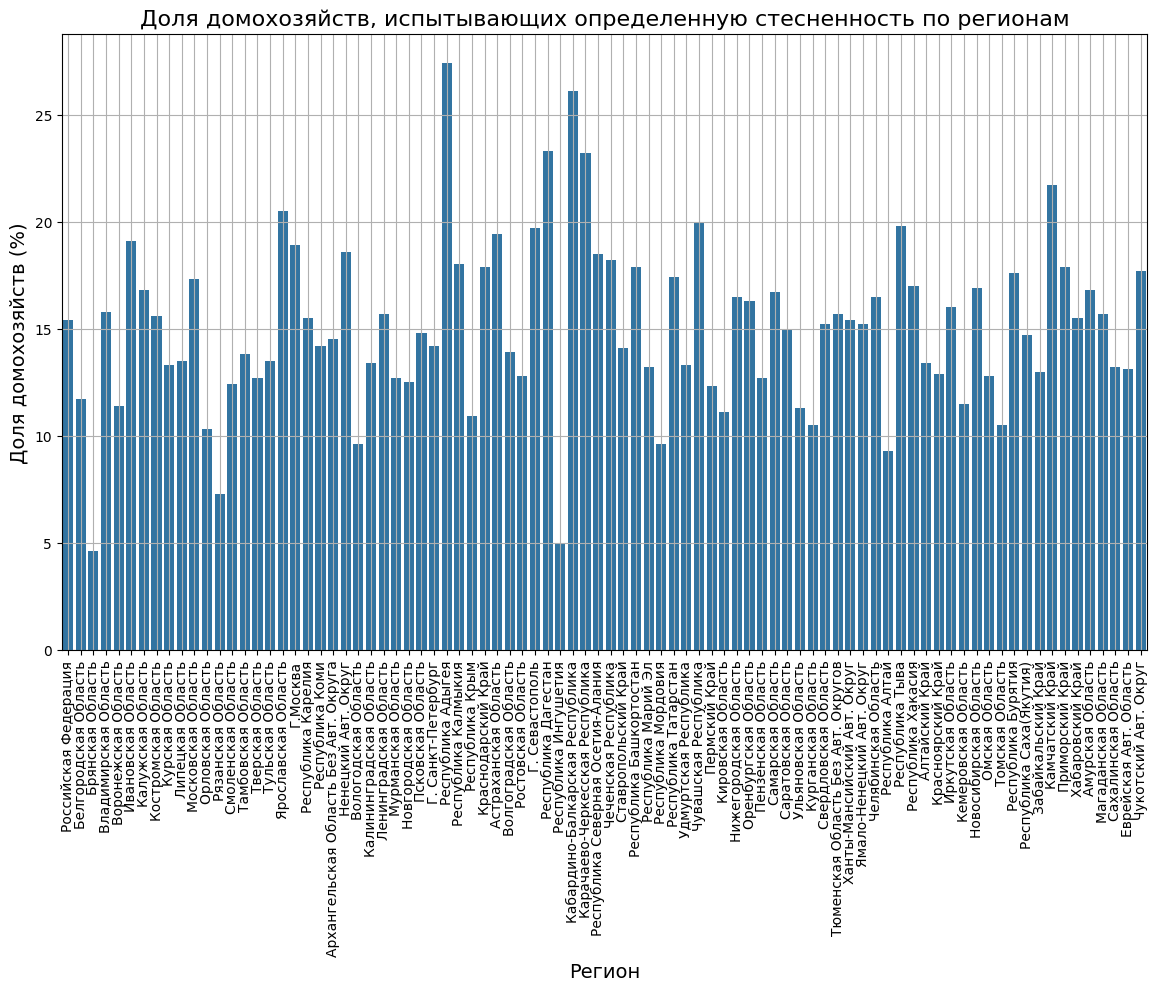

In [371]:
# Удаление регионов с пустыми значениями в указанном столбце
housing_2020_cleaned = housing_2020_cleaned[housing_2020_cleaned['в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность'].notna()]

# Создание столбчатой диаграммы
plt.figure(figsize=(14, 8))
sns.barplot(data=housing_2020_cleaned, x='Регион', y='в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность')
plt.xticks(rotation=90)  # Поворот подписей по оси X
plt.title('Доля домохозяйств, испытывающих определенную стесненность по регионам', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Доля домохозяйств (%)', fontsize=14)
plt.grid()
plt.show()


### Выводы
Республика Адыгея
Кабардино-Балкарская Республика
Карачаево-Черкесская Республика и Дагестан регионы, испытавыющую опредееннуб стесненность.

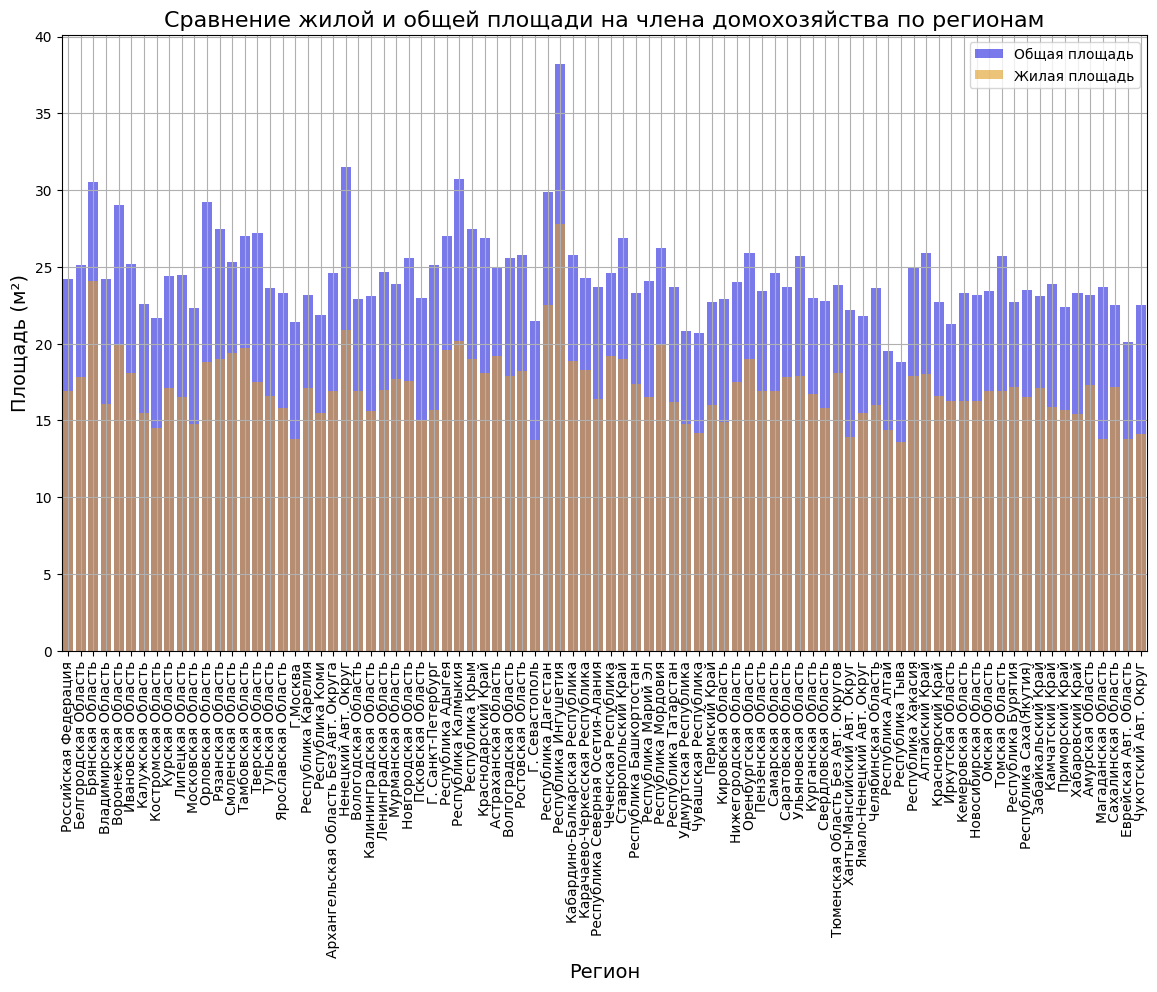

In [372]:
# Создание столбчатой диаграммы для жилой и общей площади
plt.figure(figsize=(14, 8))
sns.barplot(data=housing_2020_cleaned, x='Регион', y='Размер общей площади в расчете на члена домохозяйства', color='blue', alpha=0.6, label='Общая площадь')
sns.barplot(data=housing_2020_cleaned, x='Регион', y='Размер жилой площади в расчете на члена домохозяйства', color='orange', alpha=0.6, label='Жилая площадь')
plt.xticks(rotation=90)  # Поворот подписей по оси X
plt.title('Сравнение жилой и общей площади на члена домохозяйства по регионам', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Площадь (м²)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


### Выводы 
Регионы Дагестан и Ингушетия являются проблемными по соотношению жилой площади к общей на 1 человека. 

In [373]:
# Сортировка данных по убыванию доли домохозяйств, испытывающих определенную стесненность
top_10_problematic = housing_2020_cleaned.sort_values(
    by='в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность', 
    ascending=False
).head(10)

# Вывод результата
print(top_10_problematic[['Регион', 'в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность']])


                             Регион  \
33                Республика Адыгея   
44  Кабардино-Балкарская Республика   
42              Республика Дагестан   
45  Карачаево-Черкесская Республика   
86                  Камчатский Край   
18              Ярославская Область   
55             Чувашская Республика   
73                  Республика Тыва   
40                   Г. Севастополь   
37             Астраханская Область   

    в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность  
33                                              27.40                                              
44                                              26.10                                              
42                                              23.30                                              
45                                              23.20                                              
86                                              21.70                 

### 10. Уровень различных заболеваний по регионам

In [374]:
#print(morbidity_2005_2020_age_disease) 

# Переименование первой колонки на 'Регион'
morbidity_2005_2020_age_disease.rename(columns={morbidity_2005_2020_age_disease.columns[0]: 'Регион'}, inplace=True)
morbidity_2005_2020_age_disease.rename(columns={morbidity_2005_2020_age_disease.columns[1]: 'Заболевание'}, inplace=True)
morbidity_2005_2020_age_disease.rename(columns={morbidity_2005_2020_age_disease.columns[2]: 'Возраст'}, inplace=True)

# Получаем список годов от 2005 до конца таблицы
years = list(range(2005, 2005 + (morbidity_2005_2020_age_disease.shape[1] - 3)))

# Переименовываем все столбцы начиная с третьего на годы
morbidity_2005_2020_age_disease.columns = ['Регион', 'Заболевание', 'Возраст'] + years


# Проверка изменений
#print("Имена колонок после изменений:", morbidity_2005_2020_age_disease.columns)
#display(morbidity_2005_2020_age_disease)
print(morbidity_2005_2020_age_disease) 

# Кодировочный словарь для заболеваний
coding_dict = {
    'Беременность, роды и послеродовой период': 1,
    'Болезни уха и сосцевидного отростка': 2,
    'Психические расстройства и расстройства поведения': 3,
    'Новообразования': 4,
    'Некоторые инфекционные и паразитарные болезни': 5,
    'Врожденные аномалии (пороки развития), деформации и хромосомные нарушения': 6,
    'Болезни глаза и его придаточного аппарата': 7,
    'Болезни эндокринной системы, расстройства питания и нарушения обмена веществ': 8,
    'Болезни системы кровообращения': 9,
    'Болезни органов пищеварения': 10,
    'Болезни органов дыхания': 11,
    'Болезни нервной системы': 12,
    'Болезни мочеполовой системы': 13,
    'Болезни костно-мышечной системы и соединительной ткани': 14,
    'Травмы, отравления и другие последствия воздействия внешних причин': 15,
    'Все заболевания': 16,
    'Прочие болезни': 17,
    'Злокачественные новообразования': 18,
    'Отдельные состояния, возникающие в перинатальном периоде': 19
}

# Применение кодировочного словаря
morbidity_2005_2020_age_disease['Заболевание'] = morbidity_2005_2020_age_disease['Заболевание'].map(coding_dict)

# Удаление лишних пробелов и приведение к нижнему регистру
morbidity_2005_2020_age_disease['Регион'] = morbidity_2005_2020_age_disease['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
morbidity_2005_2020_age_disease['Регион'] = morbidity_2005_2020_age_disease['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы), проверяя на NaN
morbidity_2005_2020_age_disease['Регион'] = morbidity_2005_2020_age_disease['Регион'].apply(lambda x: x.title() if isinstance(x, str) else x)


# Проверка результата
print(morbidity_2005_2020_age_disease['Регион'].unique())

# Шаг 3: Проверка и обработка пропусков
print(morbidity_2005_2020_age_disease.isnull().sum())
# Если есть пропуски, можно удалить или заполнить их
morbidity_2005_2020_age_disease.dropna(inplace=True)

# Шаг 4: Преобразовать колонки с годами в числовые типы
#for year in years:
#    morbidity_2005_2020_age_disease[str(year)] = pd.to_numeric(morbidity_2005_2020_age_disease[str(year)], errors='coerce')
# Печатаем количество колонок для отладки
print("Количество колонок в DataFrame:", morbidity_2005_2020_age_disease.shape[1])



                                  Регион  \
0                                    NaN   
1                                    NaN   
2                   Российская Федерация   
3                   Российская Федерация   
4                   Российская Федерация   
...                                  ...   
6345          Чукотский автономный округ   
6346          Чукотский автономный округ   
6347          Чукотский автономный округ   
6348          Чукотский автономный округ   
6349          Чукотский автономный округ   

                                            Заболевание          Возраст  \
0                                                   NaN              NaN   
1                                                   NaN              NaN   
2              Беременность, роды и послеродовой период         0-14 лет   
3              Беременность, роды и послеродовой период        15-17 лет   
4              Беременность, роды и послеродовой период  18 лет и старше   
...            

Исходный DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 6348 entries, 2 to 6349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Регион       6348 non-null   object 
 1   Заболевание  6348 non-null   float64
 2   Возраст      6348 non-null   object 
 3   2005         6348 non-null   float64
 4   2006         6348 non-null   float64
 5   2007         6348 non-null   float64
 6   2008         6348 non-null   float64
 7   2009         6348 non-null   float64
 8   2010         6348 non-null   float64
dtypes: float64(7), object(2)
memory usage: 495.9+ KB
None
Количество строк до удаления пропусков: 6348
Количество строк после удаления пропусков: 6348
Данные для кластеризации:
<class 'pandas.core.frame.DataFrame'>
Index: 6348 entries, 2 to 6349
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2005    6348 non-null   float64
 1   2006    6348 non-null 

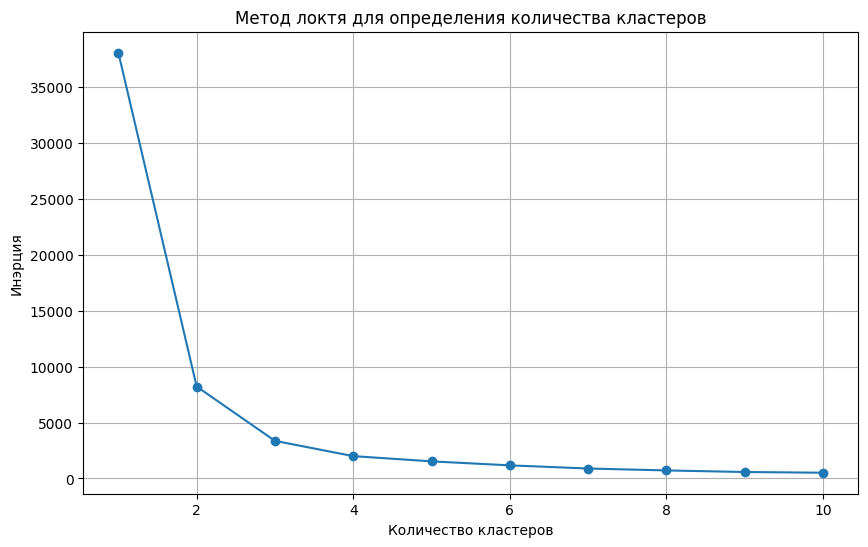

Средние значения по кластерам:
       Заболевание       2005       2006       2007       2008       2009  \
Класс                                                                       
0             8.66   3,811.81   3,938.84   4,022.22   4,071.72   4,177.56   
1            14.91 150,513.56 157,737.07 161,906.40 163,501.38 179,488.39   
2            13.97  67,109.66  69,941.76  71,053.14  71,248.51  79,135.05   

            2010  
Класс             
0       4,137.92  
1     174,259.55  
2      76,360.43  
Распределение по регионам:
                                                  Регион
Класс                                                   
0      [Российская Федерация, Российская Федерация, Р...
1      [Российская Федерация, Российская Федерация, Ц...
2      [Российская Федерация, Российская Федерация, Р...


In [375]:
# Шаг 1: Проверка данных
print("Исходный DataFrame:")
print(morbidity_2005_2020_age_disease.info())

# Шаг 2: Обработка пропусков
print("Количество строк до удаления пропусков:", len(morbidity_2005_2020_age_disease))
morbidity_2005_2020_age_disease.dropna(inplace=True)
print("Количество строк после удаления пропусков:", len(morbidity_2005_2020_age_disease))

# Проверка наличия данных для кластеризации
data_to_cluster = morbidity_2005_2020_age_disease[years]
print("Данные для кластеризации:")
print(data_to_cluster.info())

# Масштабирование данных
if not data_to_cluster.empty:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_to_cluster)

    # Продолжение с методом локтя и кластеризацией
    inertia = []
    K = range(1, 11)  # Измените диапазон при необходимости

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)

    # Визуализация метода локтя
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Инэрция')
    plt.title('Метод локтя для определения количества кластеров')
    plt.grid()
    plt.show()

    # Кластеризация с использованием K-Means
    optimal_k = 3  # Установите оптимальное значение K на основе графика метода локтя
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    morbidity_2005_2020_age_disease['Класс'] = kmeans.fit_predict(scaled_data)

    # Анализ и выводы по регионам
    numerical_columns = morbidity_2005_2020_age_disease.select_dtypes(include=['float64', 'int64']).columns
    cluster_summary = morbidity_2005_2020_age_disease.groupby('Класс')[numerical_columns].mean()
    print("Средние значения по кластерам:")
    print(cluster_summary)

    # Дополнительно, можно посмотреть на распределение по регионам
    print("Распределение по регионам:")
    print(morbidity_2005_2020_age_disease[['Регион', 'Класс']].groupby('Класс').agg(list))
else:
    print("Нет данных для кластеризации.")


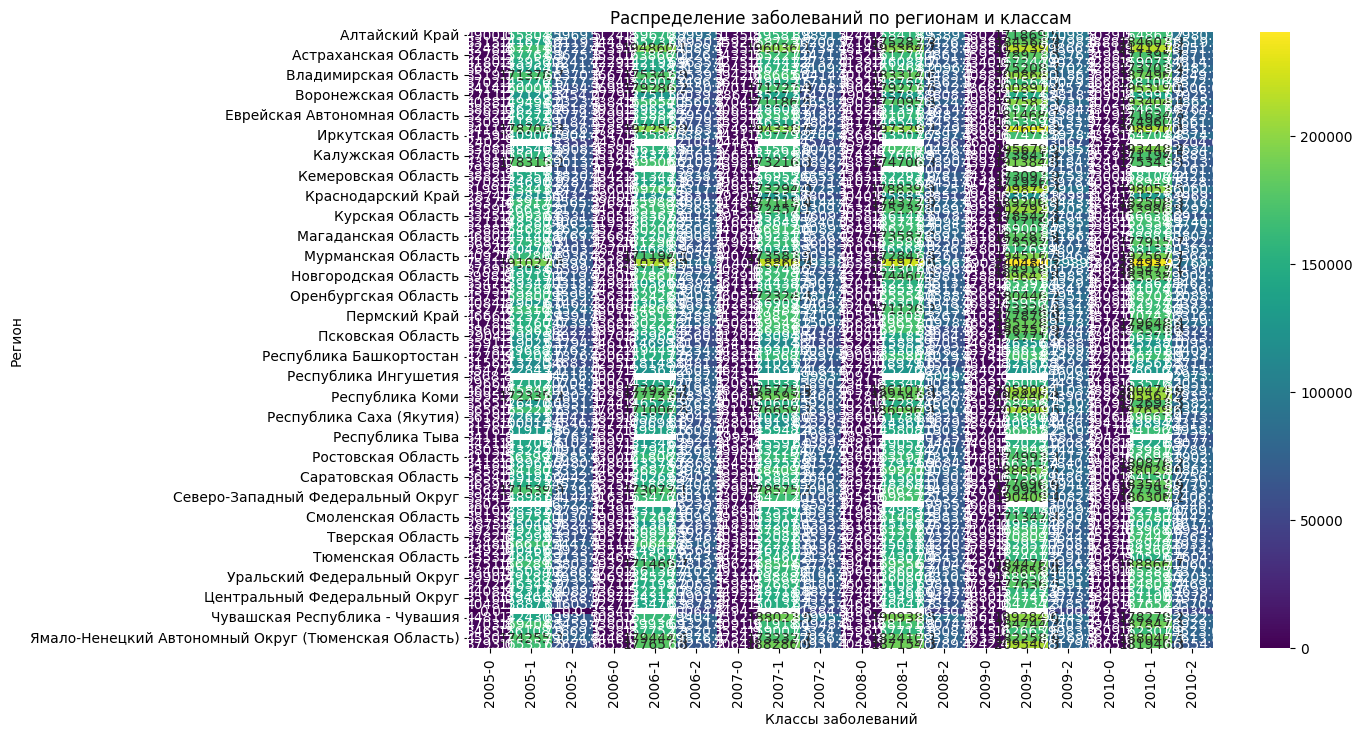

In [376]:
import seaborn as sns

# Шаг 1: Подготовка данных для тепловой карты
heatmap_data = morbidity_2005_2020_age_disease.pivot_table(index='Регион', columns='Класс', values=years, aggfunc='mean')

# Шаг 2: Визуализируем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
plt.title('Распределение заболеваний по регионам и классам')
plt.xlabel('Классы заболеваний')
plt.ylabel('Регион')
plt.show()



Регионы в кластере 0:
['Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федерация', 'Российская Федер

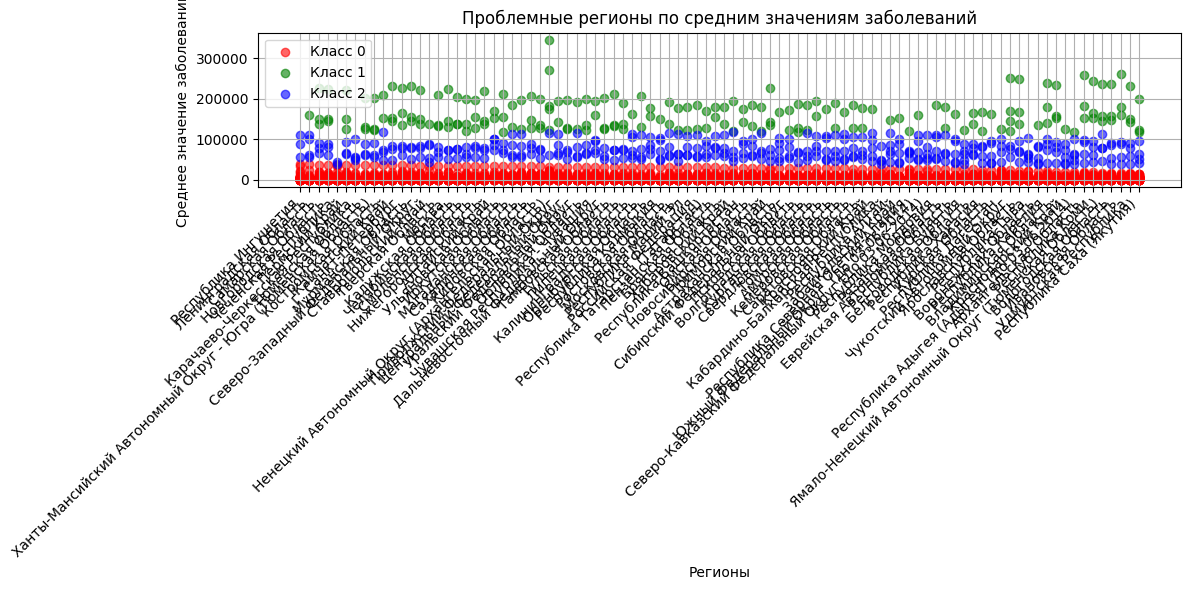

ТОП регионов из кластера 1 с наибольшим средним значением заболеваний:
                                                 Регион  \
1702  Ненецкий Автономный Округ (Архангельская Область)   
1703  Ненецкий Автономный Округ (Архангельская Область)   
460                                  Ивановская Область   
1633                              Архангельская Область   
6325                         Чукотский Автономный Округ   
1288                                Ярославская Область   
1564                                    Республика Коми   
1495                                 Республика Карелия   
1771                                Вологодская Область   
4669  Ямало-Ненецкий Автономный Округ (Тюменская Обл...   

      Средние значения заболеваний  
1702                    346,134.32  
1703                    271,401.92  
460                     262,180.37  
1633                    258,429.90  
6325                    251,880.05  
1288                    249,396.88  
1564                

In [377]:
# Выводим регионы, которые входят в каждый кластер
for cluster in range(3):  # Предполагается, что у нас 3 кластера
    regions_in_cluster = morbidity_2005_2020_age_disease[morbidity_2005_2020_age_disease['Класс'] == cluster]['Регион']
    print(f"Регионы в кластере {cluster}:")
    print(regions_in_cluster.tolist())
    print()
# Шаг 1: Создаем DataFrame для хранения средних значений заболеваний по регионам в каждом кластере
problematic_regions_summary = {}

for cluster in range(3):
    cluster_data = morbidity_2005_2020_age_disease[morbidity_2005_2020_age_disease['Класс'] == cluster]
    average_diseases = cluster_data[years].mean(axis=1)  # Вычисляем средние значения заболеваний по регионам
    problematic_regions_summary[cluster] = cluster_data[['Регион']].copy()  # Сохраняем регионы
    problematic_regions_summary[cluster]['Средние значения заболеваний'] = average_diseases  # Добавляем средние значения

    # Сортируем по средним значениям заболеваний
    problematic_regions_summary[cluster] = problematic_regions_summary[cluster].sort_values(by='Средние значения заболеваний', ascending=False)

    print(f"Проблемные регионы в кластере {cluster}:")
    print(problematic_regions_summary[cluster])
    print()
import matplotlib.pyplot as plt
import pandas as pd

# Шаг 1: Подготовка данных для графика
all_problematic_regions = pd.concat(problematic_regions_summary.values(), keys=problematic_regions_summary.keys())
all_problematic_regions.reset_index(inplace=True)
all_problematic_regions.rename(columns={'level_0': 'Класс', 'Регион': 'Регион', 'Средние значения заболеваний': 'Среднее значение заболеваний'}, inplace=True)

# Шаг 2: Создание графика
plt.figure(figsize=(12, 6))
colors = ['red', 'green', 'blue']  # Разные цвета для каждого кластера

for cluster in range(3):
    cluster_data = all_problematic_regions[all_problematic_regions['Класс'] == cluster]
    plt.scatter(cluster_data['Регион'], cluster_data['Среднее значение заболеваний'], color=colors[cluster], label=f'Класс {cluster}', alpha=0.6)

plt.title('Проблемные регионы по средним значениям заболеваний')
plt.xlabel('Регионы')
plt.ylabel('Среднее значение заболеваний')
plt.xticks(rotation=45, ha='right')  # Повернуть метки по оси X для лучшей читаемости
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# Фильтруем регионы из кластера 1
top_regions_cluster_1 = problematic_regions_summary[1].head(10)  # Получаем ТОП-10 регионов

print("ТОП регионов из кластера 1 с наибольшим средним значением заболеваний:")
print(top_regions_cluster_1)


### Выводы
Самыми уязвимыми регионами являются регионы из кластера 1:
Ненецкий Автономный Округ (Архангельская Область), Ивановская Область, Архангельская Область, Чукотский Автономный Округ, Ярославская Область   


### 11. Население по регионам

In [378]:
import pandas as pd

# Переименование колонок
population.rename(columns={'Unnamed: 0': 'Регион', 'Unnamed: 1': 'Население'}, inplace=True)

# Удаление строк, где в колонке "Регион" значение NaN
population = population.dropna(subset=['Регион'])

# Сбрасываем индексы
population.reset_index(drop=True, inplace=True)

# Преобразование всех столбцов, кроме "Регион", в числовые значения
for column in population.columns:
    if column != 'Регион':
        population[column] = pd.to_numeric(population[column], errors='coerce')

# Переименование столбцов после "Население" на года, начиная с 1999 года
start_year = 1999
columns_to_rename = population.columns[2:]  # Получаем все столбцы, идущие после "Население"
new_column_names = ['Население'] + [str(year) for year in range(start_year, start_year + len(columns_to_rename))]

# Применяем новые имена к столбцам
population.columns = ['Регион'] + new_column_names

# Проверка данных
print("Данные после переименования столбцов:")
print(population.head())


Данные после переименования столбцов:
                                              Регион  Население  \
0                                      все население        NaN   
1                               Российская Федерация     643.00   
2  Раздел 1. Муниципальные образования субъектов ...       0.00   
3                      Центральный федеральный округ      30.00   
4  Раздел 1. Муниципальные образования субъектов ...       0.00   

            1999           2000           2001           2002           2003  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2 147,539,426.00 146,890,128.00 146,303,611.00 145,649,334.00 144,963,650.00   
3            NaN            NaN            NaN            NaN            NaN   
4  38,311,159.00  38,227,656.00  38,175,094.00  38,068,452.00  37,946,810.00   

            2004           2005           2006  ...           2013  \
0       

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\1984520707.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population[column] = pd.to_numeric(population[column], errors='coerce')


In [379]:
#display(population)
# Переименование колонок
population.rename(columns={'Unnamed: 0': 'Регион', 'Unnamed: 1': 'Население'}, inplace=True)
# Удаление строк, где в колонке "Регион" значение NaN
population = population.dropna(subset=['Регион'])
# Преобразование всех столбцов, кроме "Регион", в числовые значения
for column in population.columns:
    if column != 'Регион':
        population[column] = pd.to_numeric(population[column], errors='coerce')

# Перенос данных из строк "Раздел 1. Муниципальные образования субъектов" в "Центральный федеральный округ"
for index in range(len(population)):
    if population.at[index, 'Регион'] == 'Раздел 1. Муниципальные образования субъектов Российской Федерации':
        # Находим предыдущую строку
        previous_index = index - 1
        
        # Переносим данные
        for column in population.columns:
            if column != 'Регион':
                population.at[previous_index, column] = population.at[previous_index, column] or population.at[index, column]
        
# Удаляем строки, содержащие "Раздел 1" в "Регион"
population_new = population[~population['Регион'].str.contains('Раздел 1')]

# Сбрасываем индексы после удаления
population_new.reset_index(drop=True, inplace=True)


print(population_new)


                            Регион         Население  1999  2000  2001  2002  \
0                    все население               NaN   NaN   NaN   NaN   NaN   
1             Российская Федерация            643.00   NaN   NaN   NaN   NaN   
2    Центральный федеральный округ             30.00   NaN   NaN   NaN   NaN   
3             Белгородская область 14,000,000,000.00   NaN   NaN   NaN   NaN   
4                 Брянская область 15,000,000,000.00   NaN   NaN   NaN   NaN   
..                             ...               ...   ...   ...   ...   ...   
256            Магаданская область 44,000,000,000.00   NaN   NaN   NaN   NaN   
257            Сахалинская область 64,000,000,000.00   NaN   NaN   NaN   NaN   
258   Еврейская автономная область 99,000,000,000.00   NaN   NaN   NaN   NaN   
259     Чукотский автономный округ 77,000,000,000.00   NaN   NaN   NaN   NaN   
260     Крымский федеральный округ             39.00   NaN   NaN   NaN   NaN   

     2003  2004  2005  2006  ...  2013 

C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\3263532685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.rename(columns={'Unnamed: 0': 'Регион', 'Unnamed: 1': 'Население'}, inplace=True)


### Выводы

### 12.Уровень бедности по регионам

In [380]:
poverty_socdem_2017
poverty_socdem_2018
poverty_socdem_2019
poverty_socdem_2020
# Переименование первой колонки на "Регион" для каждого датафрейма
poverty_socdem_2017.rename(columns={poverty_socdem_2017.columns[0]: 'Регион'}, inplace=True)
poverty_socdem_2018.rename(columns={poverty_socdem_2018.columns[0]: 'Регион'}, inplace=True)
poverty_socdem_2019.rename(columns={poverty_socdem_2019.columns[0]: 'Регион'}, inplace=True)
poverty_socdem_2020.rename(columns={poverty_socdem_2020.columns[0]: 'Регион'}, inplace=True)
# Функция для переименования колонок и удаления второй строки
def rename_and_drop(df):
    df.rename(columns={
        df.columns[1]: 'Все население',
        df.columns[2]: 'Дети до 16 лет',
        df.columns[3]: 'Население старше трудоспособного возраста',
        df.columns[4]: 'Население трудоспособного возраста'
    }, inplace=True)
    df.drop(index=1, inplace=True)  # Удаляем вторую строку (индекс 1)
    return df

def rename_and_drop(df):
    # Переименование колонок
    df.rename(columns={
        df.columns[1]: 'Все население',
        df.columns[2]: 'Дети до 16 лет',
        df.columns[3]: 'Население старше трудоспособного возраста',
        df.columns[4]: 'Население трудоспособного возраста'
    }, inplace=True)
    
    # Проверка наличия индекса 1 перед удалением
    if 1 in df.index:
        df.drop(index=1, inplace=True)  # Удаляем вторую строку (индекс 1)
    
    return df

# Применяем функцию ко всем датафреймам
poverty_socdem_2017 = rename_and_drop(poverty_socdem_2017)
poverty_socdem_2018 = rename_and_drop(poverty_socdem_2018)
poverty_socdem_2019 = rename_and_drop(poverty_socdem_2019)
poverty_socdem_2020 = rename_and_drop(poverty_socdem_2020)

# Объединяем датафреймы по колонке 'Регион'
merged_data = poverty_socdem_2017
merged_data = merged_data.merge(poverty_socdem_2018, on='Регион', suffixes=('_2017', '_2018'))
merged_data = merged_data.merge(poverty_socdem_2019, on='Регион', suffixes=('', '_2019'))
merged_data = merged_data.merge(poverty_socdem_2020, on='Регион', suffixes=('', '_2020'))

# Проверка объединенного датафрейма
display(merged_data)


def reshape_columns(df, year):
    # Переименовываем колонки так, чтобы они не содержали год
    df.columns = [col.split('_')[0] for col in df.columns]
    # Добавляем колонку с годом
    df['Год'] = year
    return df

# Применяем функцию к каждому датафрейму
poverty_socdem_2017_reshaped = reshape_columns(poverty_socdem_2017, 2017)
poverty_socdem_2018_reshaped = reshape_columns(poverty_socdem_2018, 2018)
poverty_socdem_2019_reshaped = reshape_columns(poverty_socdem_2019, 2019)
poverty_socdem_2020_reshaped = reshape_columns(poverty_socdem_2020, 2020)

# Объединяем все датафреймы в один
final_poverty_socdem = pd.concat([poverty_socdem_2017_reshaped, poverty_socdem_2018_reshaped, poverty_socdem_2019_reshaped, poverty_socdem_2020_reshaped])
# Удаление дополнительной колонки
final_poverty_socdem = final_poverty_socdem.drop(columns=['Дополнительная колонка'], errors='ignore')

final_poverty_socdem.dropna(subset=['Регион'], inplace=True)

final_poverty_socdem['Регион'] = final_poverty_socdem['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
final_poverty_socdem['Регион'] = final_poverty_socdem['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
final_poverty_socdem['Регион'] = final_poverty_socdem['Регион'].apply(lambda x: x.title())


# Проверка результатов
display(final_poverty_socdem.head())
# Удаление строк с пропусками
final_poverty_socdem = final_poverty_socdem.dropna()






Регион Все население_2017 Дети до 16 лет_2017  \
0                            NaN                NaN                 NaN   
1           Российская Федерация                100               39.30   
2           Белгородская область                100               43.40   
3               Брянская область                100               42.90   
4           Владимирская область                100               34.80   
..                           ...                ...                 ...   
82              Амурская область                100               39.90   
83           Магаданская область                100               32.20   
84           Сахалинская область                100               36.40   
85  Еврейская автономная область                100                  36   
86    Чукотский автономный округ                100               46.90   

   Население старше трудоспособного возраста_2017  \
0                                             NaN   
1                                            6.60   
2                                           11.80   
3                                            4.90   
4                                            8.60   
..                                            ...   
82                                              6   
83                                          14.80   
84                                           6.40   
85                                           9.90   
86                                           2.70   

   Население трудоспособного возраста_2017 Все население_2018  \
0                                      NaN                NaN   
1                                    54.10                100   
2                                    44.80                100   
3                                    52.20                100   
4                                    56.60                100   
..                                     ...                ...   
82                                   54.10                100   
83                                      53                100   
84                                   57.10                100   
85                                   54.10                100   
86                                   50.40                100   

   Дети до 16 лет_2018 Население старше трудоспособного возраста_2018  \
0                  NaN                                            NaN   
1                39.90                                           6.50   
2                44.80                                          12.90   
3                40.30                                           1.80   
4                48.90                                           8.30   
..                 ...                                            ...   
82               40.60                                           4.60   
83               30.70                                          11.50   
84               32.90                                           4.30   
85               33.70                                           7.40   
86                  51                                              0   

   Население трудоспособного возраста_2018 Все население Дети до 16 лет  \
0                                      NaN           NaN            NaN   
1                                    53.70           100             41   
2                                    42.30           100              0   
3                                    57.90           100          37.50   
4                                    42.80           100          34.80   
..                                     ...           ...            ...   
82                                   54.80           100          33.90   
83                                   57.80           100          45.80   
84                                   62.80           100          44.90   
85                                   58.90           100             32   
86   

Регион Все население Дети до 16 лет  \
2  Российская Федерация           100          39.30   
3  Белгородская Область           100          43.40   
4      Брянская Область           100          42.90   
5  Владимирская Область           100          34.80   
6   Воронежская Область           100          38.60   

  Население старше трудоспособного возраста  \
2                                      6.60   
3                                     11.80   
4                                      4.90   
5                                      8.60   
6                                      5.90   

  Население трудоспособного возраста   Год  
2                              54.10  2017  
3                              44.80  2017  
4                              52.20  2017  
5                              56.60  2017  
6                              55.60  2017

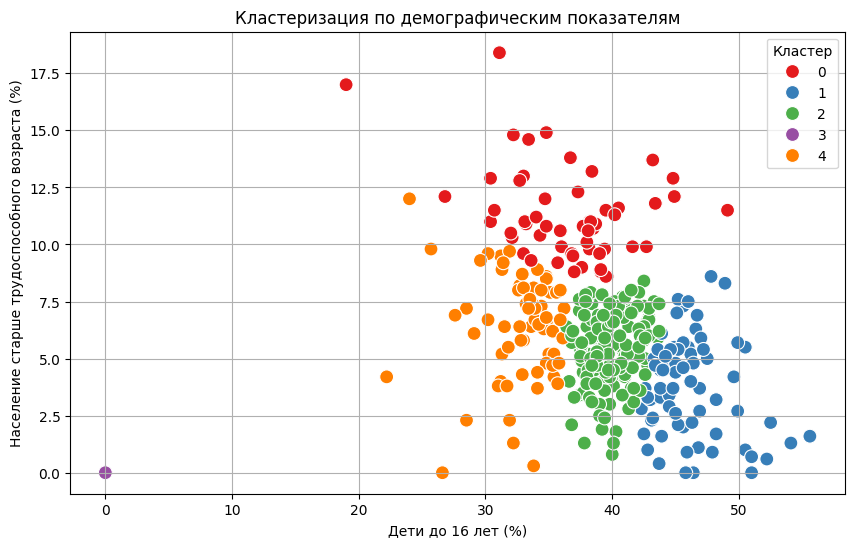

                          Регион  Кластер
2           Российская Федерация        2
3           Белгородская Область        0
4               Брянская Область        2
5           Владимирская Область        4
6            Воронежская Область        2
..                           ...      ...
82               Камчатский Край        2
83               Приморский Край        1
84              Хабаровский Край        4
85              Амурская Область        2
88  Еврейская Автономная Область        0

[340 rows x 2 columns]


In [387]:
# Выбор столбцов для кластеризации
X = final_poverty_socdem[['Дети до 16 лет', 'Население старше трудоспособного возраста', 'Население трудоспособного возраста']]

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение K-Means кластеризации
kmeans = KMeans(n_clusters=5, random_state=0)
final_poverty_socdem['Кластер'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Дети до 16 лет', y='Население старше трудоспособного возраста', hue='Кластер',data= final_poverty_socdem, palette='Set1', s=100)
plt.title('Кластеризация по демографическим показателям')
plt.xlabel('Дети до 16 лет (%)')
plt.ylabel('Население старше трудоспособного возраста (%)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

# Вывод кластеров
print(final_poverty_socdem[['Регион', 'Кластер']])


In [382]:
# Получение списка регионов в кластере 0
regions_cluster_1 = final_poverty_socdem[final_poverty_socdem['Кластер'] == 1][['Регион', 'Кластер']]

# Вывод списка
print(regions_cluster_1)


                                               Регион  Кластер
18                                   Тульская Область        1
20  Город Москва Столица Российской Федерации Горо...        1
24  Ненецкий Автономный Округ (Архангельская Область)        1
29                                 Мурманская Область        1
46                               Чеченская Республика        1
..                                                ...      ...
69                                   Республика Алтай        1
70                                    Республика Тыва        1
71                                 Республика Хакасия        1
81                           Республика Саха (Якутия)        1
83                                    Приморский Край        1

[73 rows x 2 columns]


### Выводы 
88 регионов из Кластера 1 находятся в зоне риска из-за дефицита трудоспособного населения и большого числа детей до 16 лет. 
(Тульская Область
город Москва
Ненецкий Автономный Округ (Архангельская Область)
Мурманская Область
Чеченская Республика и т.д.)

### 13. Уровень бедности по регионам с 1992 по 2020

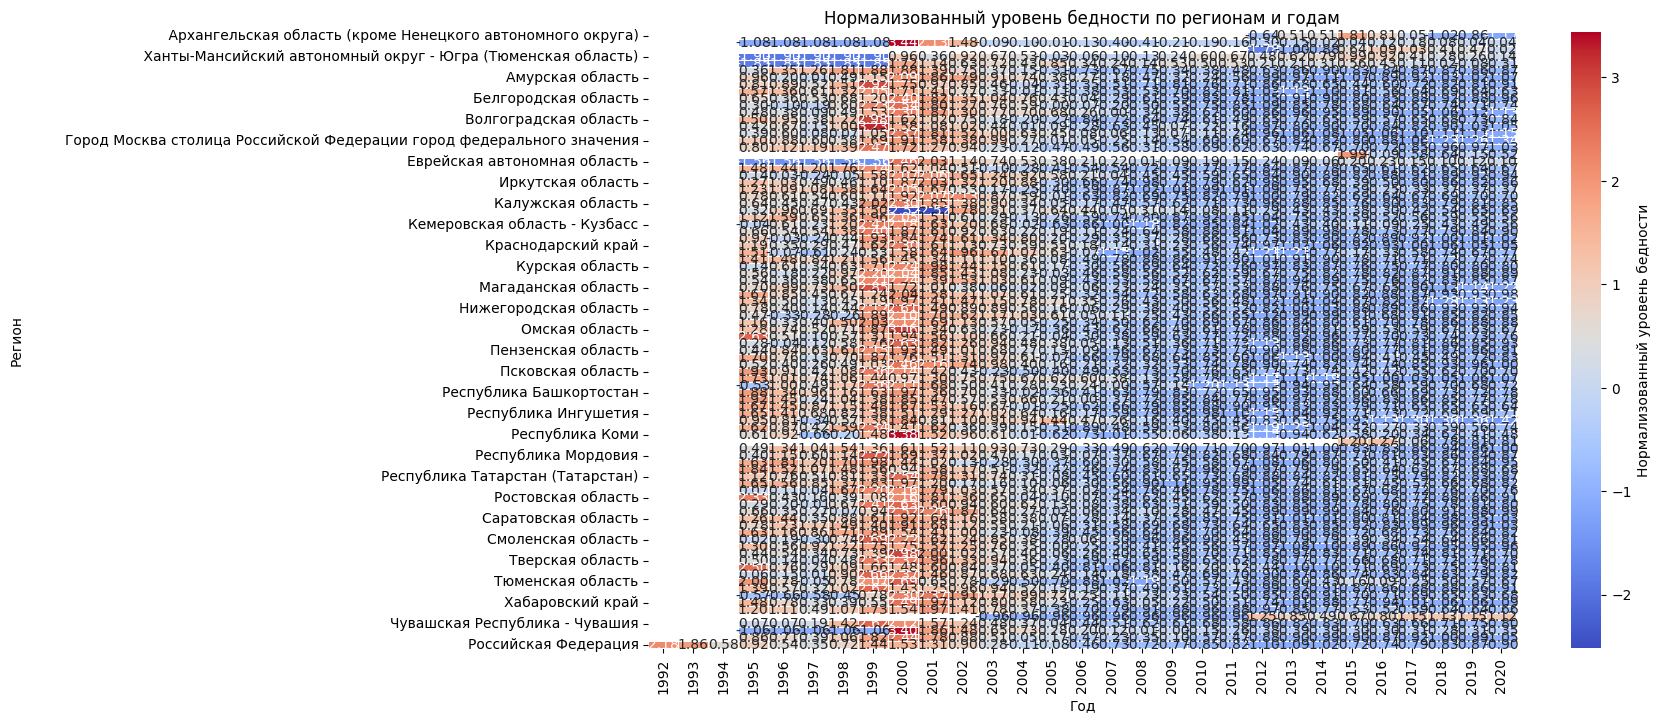

In [383]:
# Нормализация данных по каждому региону
poverty_procent_by_regions_1992_2020['normalized_poverty_percent'] = poverty_procent_by_regions_1992_2020.groupby('Регион')['poverty_percent'].transform(lambda x: (x - x.mean()) / x.std())

# Преобразуем данные для тепловой карты
pivot_table = poverty_procent_by_regions_1992_2020.pivot_table(values='normalized_poverty_percent', index='Регион', columns='Год', aggfunc='mean')

# Создание тепловой карты с нормализованными данными
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Нормализованный уровень бедности'})
plt.title("Нормализованный уровень бедности по регионам и годам")
plt.xlabel("Год")
plt.ylabel("Регион")
plt.show()


### Выводы
Очень четко прослеживается перид, когда уровень бедности был высоким на всей территрии РФ, (1995-2003) и заметное снижение наблюдается по 2020 год.

### 14. Оборот ритейла по регионам на душу населения

In [384]:
#display(retail_turnover_per_capita_2000_2021)
# Создание списка названий колонок
retail_turnover_per_capita_2000_2021.columns = ['Регион', 'Валюта'] + list(range(2000, 2022))
retail_turnover_per_capita_2000_2021 = retail_turnover_per_capita_2000_2021.dropna(subset=['Регион'])

#display(retail_turnover_per_capita_2000_2021)

retail_turnover_per_capita_2000_2021['Регион'] = retail_turnover_per_capita_2000_2021['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
retail_turnover_per_capita_2000_2021['Регион'] = retail_turnover_per_capita_2000_2021['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
retail_turnover_per_capita_2000_2021['Регион'] = retail_turnover_per_capita_2000_2021['Регион'].apply(lambda x: x.title())

# Проверка изменений
#display(retail_turnover_per_capita_2000_2021)

retail_turnover_per_capita_melted = retail_turnover_per_capita_2000_2021.melt(id_vars=['Регион', 'Валюта'], 
                                                                             var_name='Год', 
                                                                             value_name='Оборот розничной торговли на душу населения')
# Заполняем NaN медианным значением по каждому году
# Удаляем строки с NaN в числовых данных
retail_turnover_per_capita_melted_cleaned = retail_turnover_per_capita_melted.dropna(subset=retail_turnover_per_capita_melted.columns[2:])


# Проверка изменений
display(retail_turnover_per_capita_melted_cleaned)


C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\1044373719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_turnover_per_capita_2000_2021['Регион'] = retail_turnover_per_capita_2000_2021['Регион'].str.strip().str.lower()
C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\1044373719.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_turnover_per_capita_2000_2021['Регион'] = retail_turnover_per_capita_2000_2021['Регион'].replace(region_mapping)
C:\Users\HONOR\AppData\Local\Temp\ipykernel_1

Регион Валюта   Год  \
0              Российская Федерация  рубль  2000   
1     Центральный Федеральный Округ  рубль  2000   
2              Белгородская Область  рубль  2000   
3                  Брянская Область  рубль  2000   
4              Владимирская Область  рубль  2000   
...                             ...    ...   ...   
2370               Амурская Область  рубль  2021   
2371            Магаданская Область  рубль  2021   
2372            Сахалинская Область  рубль  2021   
2373   Еврейская Автономная Область  рубль  2021   
2374     Чукотский Автономный Округ  рубль  2021   

     Оборот розничной торговли на душу населения  
0                                          16046  
1                                          26062  
2                                          11820  
3                                           8267  
4                                           7442  
...                                          ...  
2370                                      276635  
2371                                      289171  
2372                                      364356  
2373                                      188492  
2374                                      225671  

[2142 rows x 4 columns]

In [388]:
# 1. Нормализуем данные по годам
scaler = StandardScaler()
turnover_scaled = scaler.fit_transform(retail_turnover_per_capita_melted_cleaned.drop(['Регион', 'Валюта'], axis=1))
# Линейный график для отображения изменений оборота по годам в зависимости от кластера
plt.figure(figsize=(12, 6))

sns.lineplot(x='Год', y='Оборот розничной торговли на душу населения', hue='Cluster', 
             data=retail_turnover_per_capita_melted_cleaned, palette='viridis')

plt.title('Изменение оборота розничной торговли на душу населения по кластерам')
plt.xlabel('Год')
plt.ylabel('Оборот розничной торговли на душу населения')
plt.legend(title='Кластер')
plt.tight_layout()

# Отображение графика
plt.show()



ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [107]:
# Группируем данные по кластерам и выводим регионы в каждом кластере
regions_by_cluster = retail_turnover_per_capita_melted_cleaned.groupby('Cluster')['Регион'].unique()

# Выводим список регионов для каждого кластера
for cluster, regions in regions_by_cluster.items():
    print(f"Кластер {cluster}:")
    print(", ".join(regions))
    print("\n")


Кластер 0:
Город Москва Столица Российской Федерации Город Федерального Значения, Тюменская Область, Ханты-Мансийский Автономный Округ - Югра (Тюменская Область), Ямало-Ненецкий Автономный Округ (Тюменская Область), Московская Область, Северо-Западный Федеральный Округ, Республика Коми, Ненецкий Автономный Округ (Архангельская Область), Мурманская Область, Город Санкт-Петербург Город Федерального Значения, Краснодарский Край, Ростовская Область, Республика Башкортостан, Республика Татарстан (Татарстан), Пермский Край, Самарская Область, Уральский Федеральный Округ, Свердловская Область, Красноярский Край, Кемеровская Область - Кузбасс, Новосибирская Область, Республика Саха (Якутия), Сахалинская Область, Брянская Область, Воронежская Область, Калужская Область, Курская Область, Липецкая Область, Орловская Область, Рязанская Область, Смоленская Область, Тамбовская Область, Тверская Область, Тульская Область, Ярославская Область, Республика Карелия, Архангельская Область, Вологодская Обл

### Выводы 
Регионы из Кластера 2 с очень низким оборотом на душу населения. 
Брянская Область, Владимирская Область, Воронежская Область, Ивановская Область, Калужская Область и т.д.



### 15. Доля социальных расходов по регионам

In [111]:
display(welfare_expense_share_2015_2020)
# Переименование колонки 'region' на 'Регион'
welfare_expense_share_2015_2020.rename(columns={'region': 'Регион'}, inplace=True)
welfare_expense_share_2015_2020['Регион'] = welfare_expense_share_2015_2020['Регион'].str.strip().str.lower()

# Применение словаря сопоставления для корректировки названий регионов
welfare_expense_share_2015_2020['Регион'] = welfare_expense_share_2015_2020['Регион'].replace(region_mapping)

# Приведение названий регионов к правильному формату (с заглавной буквы)
welfare_expense_share_2015_2020['Регион'] = welfare_expense_share_2015_2020['Регион'].apply(lambda x: x.title())

# Проверка изменений
#print(welfare_expense_share_2015_2020.head())
# Используем метод melt для создания колонки 'Год' и переноса данных по годам в один столбец
welfare_expense_share_2015_2020_melted = welfare_expense_share_2015_2020.melt(id_vars=['Регион'], 
                                                                             var_name='Год', 
                                                                             value_name='Доля расходов на социальное обеспечение')

# Проверка изменений
print(welfare_expense_share_2015_2020_melted.columns)


region  2015  2016  2017  2018  2019  2020
0              Российская Федерация 15.80 16.60 20.40 20.30 19.80 21.30
1   Центральный\n федеральный округ   NaN   NaN   NaN   NaN   NaN   NaN
2              Белгородская область 11.30 11.80 16.40 15.60 13.80 16.10
3                  Брянская область 22.00 26.60 24.70 23.70 20.70 23.10
4              Владимирская область 18.10 18.00 24.00 23.40 23.40 26.00
..                              ...   ...   ...   ...   ...   ...   ...
89                 Амурская область 19.20 28.90 26.30 24.10 22.70 21.70
90              Магаданская область  9.80 10.60 13.40 12.80 12.30 11.10
91              Сахалинская область  6.40  9.90 16.80 14.30 13.80 16.50
92     Еврейская автономная область 18.40 17.70 28.30 27.80 25.70 31.20
93       Чукотский автономный округ  6.90  6.50  7.80  7.00  4.70  6.40

[94 rows x 7 columns]

Index(['Регион', 'Год', 'Доля расходов на социальное обеспечение'], dtype='object')


C:\Users\HONOR\AppData\Local\Temp\ipykernel_14944\1029322565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


                                         Регион
213                     Калининградская Область
281                  Чукотский Автономный Округ
284                        Белгородская Область
289                           Калужская Область
301                                      Москва
307                     Калининградская Область
308                       Ленинградская Область
312                          Г. Санкт-Петербург
313                   Ненецкий Автономный Округ
317                             Республика Крым
322                              Г. Севастополь
335                        Республика Татарстан
351  Ханты-Мансийский \nАвтономный Округ - Югра
352           Ямало-Ненецкий \nАвтономный Округ
354                            Республика Алтай
366                    Республика Саха (Якутия)
368                             Камчатский Край
372                         Магаданская Область
373                         Сахалинская Область
375                  Чукотский Автономны

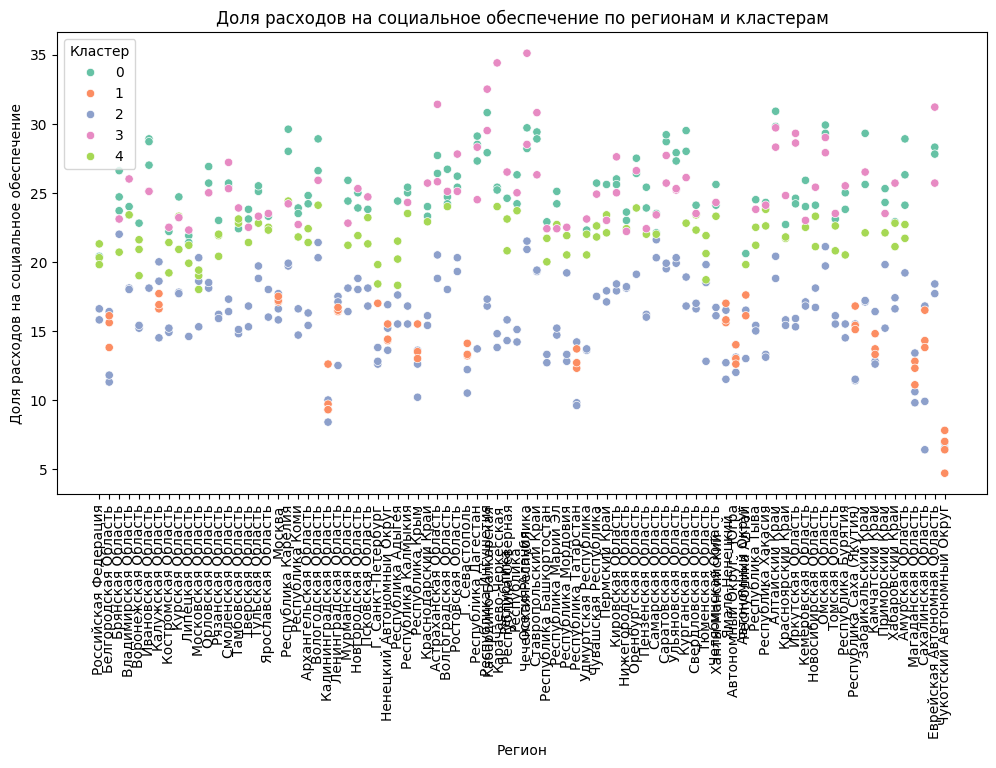

In [121]:
# Удаляем строки с NaN
df_cleaned = welfare_expense_share_2015_2020_melted.dropna()

# Преобразуем данные в числовой формат, если это необходимо
for col in df_cleaned.columns[1:]:  # Пропускаем столбец 'Регион'
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Удаляем строки с NaN после преобразования
df_cleaned = df_cleaned.dropna()

# Нормализуем данные по годам
scaler = StandardScaler()
social_security_scaled = scaler.fit_transform(df_cleaned.drop(['Регион'], axis=1))

# Применяем KMeans для кластеризации
kmeans = KMeans(n_clusters=5, random_state=42)  # Например, 3 кластера
df_cleaned['Cluster'] = kmeans.fit_predict(social_security_scaled)

# Считаем средние значения для каждого кластера
cluster_means = df_cleaned.groupby('Cluster').mean(numeric_only=True)

# Определяем кластер с наименьшими средними значениями по всем годам
lowest_mean_values = cluster_means.min(axis=1)  # Минимальные средние значения для каждого кластера
lowest_security_cluster = lowest_mean_values.idxmin()  # Индекс кластера с наименьшим средним значением

# Выводим регионы из кластера с самой низкой долей соц обеспечения
regions_low_security = df_cleaned[df_cleaned['Cluster'] == lowest_security_cluster]
print(regions_low_security[['Регион']])
# Создаем scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='Регион', y='Доля расходов на социальное обеспечение', hue='Cluster', palette='Set2')
plt.title('Доля расходов на социальное обеспечение по регионам и кластерам')
plt.xticks(rotation=90)
plt.xlabel('Регион')
plt.ylabel('Доля расходов на социальное обеспечение')
plt.legend(title='Кластер')
plt.show()



In [128]:
# Выводим регионы из первого кластера
cluster_1_regions = df_cleaned[df_cleaned['Cluster'] == 1]

# Печатаем список регионов из первого кластера
print(len(cluster_1_regions[['Регион']]))


53


### Выводы
53 региона находится в зоне риска т.к. у кластера 1 доля расходов на социальное обеспечение менее 15%

### Ответы на вопросы:


# 1.Влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе


In [277]:
display(poverty_procent_by_regions_1992_2020)
display(final_poverty_socdem)

Регион   Год  poverty_percent  \
0                   Российская Федерация  1992            33.50   
1                   Российская Федерация  1993            31.30   
2                   Российская Федерация  1994            22.40   
3                   Российская Федерация  1995            24.80   
4                   Российская Федерация  1996            22.10   
...                                  ...   ...              ...   
2334          Чукотский автономный округ  2017             8.50   
2335          Чукотский автономный округ  2018             8.80   
2336          Чукотский автономный округ  2019             8.50   
2337          Чукотский автономный округ  2020             8.00   
2338          Крымский федеральный округ  2015             0.00   

      normalized_poverty_percent  
0                           2.18  
1                           1.86  
2                           0.58  
3                           0.92  
4                           0.54  
...                          ...  
2334                       -0.31  
2335                       -0.28  
2336                       -0.31  
2337                       -0.35  
2338                         NaN  

[2339 rows x 4 columns]

Регион Все население Дети до 16 лет  \
2           Российская Федерация           100          39.30   
3           Белгородская Область           100          43.40   
4               Брянская Область           100          42.90   
5           Владимирская Область           100          34.80   
6            Воронежская Область           100          38.60   
..                           ...           ...            ...   
82               Камчатский Край           100          42.60   
83               Приморский Край           100          49.60   
84              Хабаровский Край           100          32.70   
85              Амурская Область           100          38.40   
88  Еврейская Автономная Область           100          34.80   

   Население старше трудоспособного возраста  \
2                                       6.60   
3                                      11.80   
4                                       4.90   
5                                       8.60   
6                                       5.90   
..                                       ...   
82                                      5.90   
83                                      4.20   
84                                      6.40   
85                                      4.70   
88                                     10.80   

   Население трудоспособного возраста   Год  Кластер  
2                               54.10  2017        2  
3                               44.80  2017        0  
4                               52.20  2017        2  
5                               56.60  2017        4  
6                               55.60  2017        2  
..                                ...   ...      ...  
82                              51.50  2020        2  
83                              46.20  2020        1  
84                              60.90  2020        4  
85                              56.90  2020        2  
88                              54.40  2020        0  

[340 rows x 7 columns]

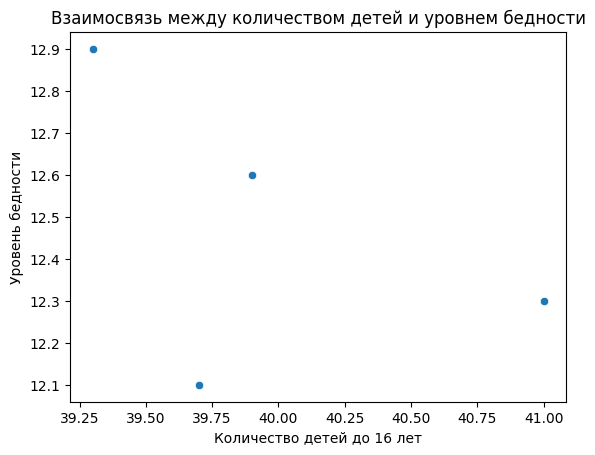

In [283]:
# Шаг 1: Объединение данных
merged_data = pd.merge(poverty_procent_by_regions_1992_2020, final_poverty_socdem, on=['Регион', 'Год'])

# Шаг 2: Очистка данных
merged_data.dropna(subset=['poverty_percent', 'Дети до 16 лет', 'Население старше трудоспособного возраста'], inplace=True)

# Шаг 3: Визуализация (пример)
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=merged_data, x='Дети до 16 лет', y='poverty_percent')
plt.title('Взаимосвязь между количеством детей и уровнем бедности')
plt.xlabel('Количество детей до 16 лет')
plt.ylabel('Уровень бедности')
plt.show()

# Шаг 4: Регрессионный анализ
X = merged_data[['Дети до 16 лет', 'Население старше трудоспособного возраста']]
y = merged_data['poverty_percent']

# Добавляем константу (свободный член)
X = sm.add_constant(X)


In [284]:
# Проверьте типы данных
print(merged_data.dtypes)

# Приведите столбцы к правильным типам, если они имеют тип object
merged_data['Дети до 16 лет'] = pd.to_numeric(merged_data['Дети до 16 лет'], errors='coerce')
merged_data['Население старше трудоспособного возраста'] = pd.to_numeric(merged_data['Население старше трудоспособного возраста'], errors='coerce')
merged_data['poverty_percent'] = pd.to_numeric(merged_data['poverty_percent'], errors='coerce')

# Очистите данные от NaN значений
merged_data.dropna(subset=['poverty_percent', 'Дети до 16 лет', 'Население старше трудоспособного возраста'], inplace=True)

# Повторите регрессионный анализ
X = merged_data[['Дети до 16 лет', 'Население старше трудоспособного возраста']]
y = merged_data['poverty_percent']

# Добавляем константу
X = sm.add_constant(X)

# Модель
model = sm.OLS(y, X).fit()

# Результаты
print(model.summary())


Регион                                        object
Год                                            int64
poverty_percent                              float64
normalized_poverty_percent                   float64
Все население                                 object
Дети до 16 лет                                object
Население старше трудоспособного возраста     object
Население трудоспособного возраста            object
Кластер                                        int32
dtype: object
                            OLS Regression Results                            
Dep. Variable:        poverty_percent   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.623e+04
Date:                Sun, 15 Sep 2024   Prob (F-statistic):            0.00555
Time:                        22:27:47   Log-Likelihood:                 19.875
No. Observations:                  

c:\Users\HONOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                    Variable      VIF
0                                      const 4,396.30
1                             Дети до 16 лет     1.22
2  Население старше трудоспособного возраста     1.22


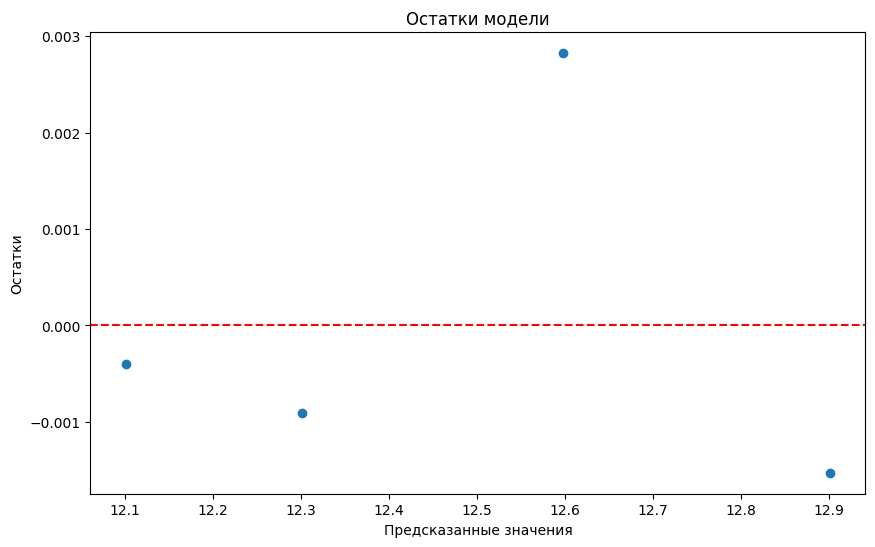

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Расчет VIF
X_vif = merged_data[['Дети до 16 лет', 'Население старше трудоспособного возраста']]
X_vif = sm.add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)
import matplotlib.pyplot as plt

# Остатки
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()


In [286]:
# Получение коэффициентов и p-значений
coefficients = model.params
p_values = model.pvalues

# Создание DataFrame для представления результатов
results = pd.DataFrame({
    'Коэффициент': coefficients,
    'P-значение': p_values
})

print(results)


                                           Коэффициент  P-значение
const                                            26.94        0.00
Дети до 16 лет                                   -0.43        0.00
Население старше трудоспособного возраста         0.45        0.00


### Выводы
Интерпретация коэффициентов
Константа (const):

Коэффициент: 26.94
P-значение: 0.00
Это значение представляет уровень бедности, когда количество детей до 16 лет и пенсионеров равно нулю. Оно статистически значимо.
Дети до 16 лет:

Коэффициент: -0.43
P-значение: 0.00
Это означает, что при увеличении количества детей до 16 лет на единицу уровень бедности уменьшается на 0.43%. P-значение меньше 0.05 указывает на статистическую значимость этого эффекта. Это может свидетельствовать о том, что регионы с большим количеством детей могут получать больше социальных пособий или иметь другие факторы, способствующие снижению бедности.
Население старше трудоспособного возраста:

Коэффициент: 0.45
P-значение: 0.00
Это означает, что при увеличении количества пенсионеров на единицу уровень бедности увеличивается на 0.45%. P-значение также меньше 0.05, что указывает на статистическую значимость. Это может указывать на то, что увеличение числа пенсионеров в регионе может создавать дополнительное финансовое бремя на социальные службы, что приводит к повышению уровня бедности.
Общие выводы
Зависимость:
Наличие детей до 16 лет в регионе ассоциируется со снижением уровня бедности, в то время как увеличение числа пенсионеров связано с его увеличением.
Политические рекомендации:
Возможно, стоит рассмотреть программы, направленные на поддержку семей с детьми, а также оценить влияние увеличения числа пенсионеров на социальное обеспечение и финансовые ресурсы региона.

### Вопрос 2.Связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе;


In [287]:
display(poverty_procent_by_regions_1992_2020)
display(merged_data_regional_production_2005_2020_melted)

Регион   Год  poverty_percent  \
0                   Российская Федерация  1992            33.50   
1                   Российская Федерация  1993            31.30   
2                   Российская Федерация  1994            22.40   
3                   Российская Федерация  1995            24.80   
4                   Российская Федерация  1996            22.10   
...                                  ...   ...              ...   
2334          Чукотский автономный округ  2017             8.50   
2335          Чукотский автономный округ  2018             8.80   
2336          Чукотский автономный округ  2019             8.50   
2337          Чукотский автономный округ  2020             8.00   
2338          Крымский федеральный округ  2015             0.00   

      normalized_poverty_percent  
0                           2.18  
1                           1.86  
2                           0.58  
3                           0.92  
4                           0.54  
...                          ...  
2334                       -0.31  
2335                       -0.28  
2336                       -0.31  
2337                       -0.35  
2338                         NaN  

[2339 rows x 4 columns]

Регион   Год  \
0          Агинский Бурятский Округ (Забайкальский Край)  2005   
1          Агинский Бурятский Округ (Забайкальский Край)  2005   
2          Агинский Бурятский Округ (Забайкальский Край)  2005   
14     Коми-Пермяцкий Округ, Входящий В Состав Пермск...  2005   
15     Коми-Пермяцкий Округ, Входящий В Состав Пермск...  2005   
...                                                  ...   ...   
24502                               Российская Федерация  2020   
24503                               Российская Федерация  2020   
24505                               Российская Федерация  2020   
24509                               Российская Федерация  2020   
24511                               Российская Федерация  2020   

               Значение  
0            121,047.20  
1            147,423.80  
2             58,537.90  
14           263,100.90  
15           191,471.80  
...                 ...  
24502  5,959,974,485.08  
24503 47,782,550,088.77  
24505  1,497,198,469.79  
24509    528,078,829.15  
24511 69,670,179,334.33  

[11276 rows x 3 columns]

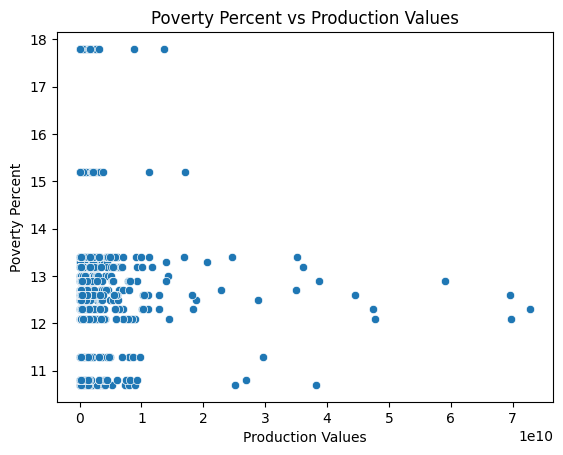

                 poverty_percent  Значение
poverty_percent             1.00     -0.05
Значение                   -0.05      1.00


In [289]:
import pandas as pd

# Load the datasets
poverty_data = poverty_procent_by_regions_1992_2020
production_data = merged_data_regional_production_2005_2020_melted

# Merge datasets
merged_data = pd.merge(poverty_data, production_data, on=['Регион', 'Год'], how='inner')

# Remove rows with NaN values in relevant columns
merged_data = merged_data.dropna(subset=['poverty_percent', 'Значение'])

# Correlation analysis
correlation = merged_data[['poverty_percent', 'Значение']].corr()

# Visualize the relationship
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=merged_data, x='Значение', y='poverty_percent')
plt.title('Poverty Percent vs Production Values')
plt.xlabel('Production Values')
plt.ylabel('Poverty Percent')
plt.show()

# Display correlation matrix
print(correlation)


### Вывод
Слабая отрицательная корреляция: Коэффициент -0.05 говорит о том, что между уровнем бедности и значениями производства практически нет линейной связи. Это означает, что увеличение значений производства не связано со значительным снижением уровня бедности и наоборот. В практическом плане это говорит о том, что изменения в производственных показателях не оказывают значительного влияния на уровень бедности в регионах.

### Вопрос 3.какие ещё зависимости можно наблюдать относительно социально незащищённых слоёв населения.


In [292]:
display(welfare_expense_share_2015_2020_melted)
display(disabled_total_by_age_2017_2022_final)


Регион   Год  \
0               Российская Федерация  2015   
1    Центральный\n Федеральный Округ  2015   
2               Белгородская Область  2015   
3                   Брянская Область  2015   
4               Владимирская Область  2015   
..                               ...   ...   
559                 Амурская Область  2020   
560              Магаданская Область  2020   
561              Сахалинская Область  2020   
562     Еврейская Автономная Область  2020   
563       Чукотский Автономный Округ  2020   

     Доля расходов на социальное обеспечение  
0                                      15.80  
1                                        NaN  
2                                      11.30  
3                                      22.00  
4                                      18.10  
..                                       ...  
559                                    21.70  
560                                    11.10  
561                                    16.50  
562                                    31.20  
563                                     6.40  

[564 rows x 3 columns]

Регион Возраст   Год   Значение
0        Алтайский край   18_30  2017  94,519.00
1        Алтайский край   18_30  2018  95,338.00
2        Алтайский край   18_30  2019  89,164.00
3        Алтайский край   18_30  2020  85,613.00
4        Алтайский край   18_30  2021  86,568.00
...                 ...     ...   ...        ...
2845  город Севастополь     60_  2018 145,360.00
2846  город Севастополь     60_  2019 149,814.00
2847  город Севастополь     60_  2020 153,215.00
2848  город Севастополь     60_  2021 157,225.00
2849  город Севастополь     60_  2022  52,091.00

[2850 rows x 4 columns]

                 Регион   Год  Доля расходов на социальное обеспечение  \
0  Российская Федерация  2017                                    20.40   
1  Российская Федерация  2017                                    20.40   
2  Российская Федерация  2017                                    20.40   
3  Российская Федерация  2017                                    20.40   
4  Российская Федерация  2017                                    20.40   

  Возраст      Значение  
0   18_30  6,477,294.00  
1   31_40  9,242,096.00  
2   41_50 12,330,511.00  
3   51_60 25,088,590.00  
4     60_ 85,371,641.00  
Регион                                      object
Год                                         object
Доля расходов на социальное обеспечение    float64
Возраст                                     object
Значение                                   float64
dtype: object
                                         Доля расходов на социальное обеспечение  \
Доля расходов на социальное обеспечение       

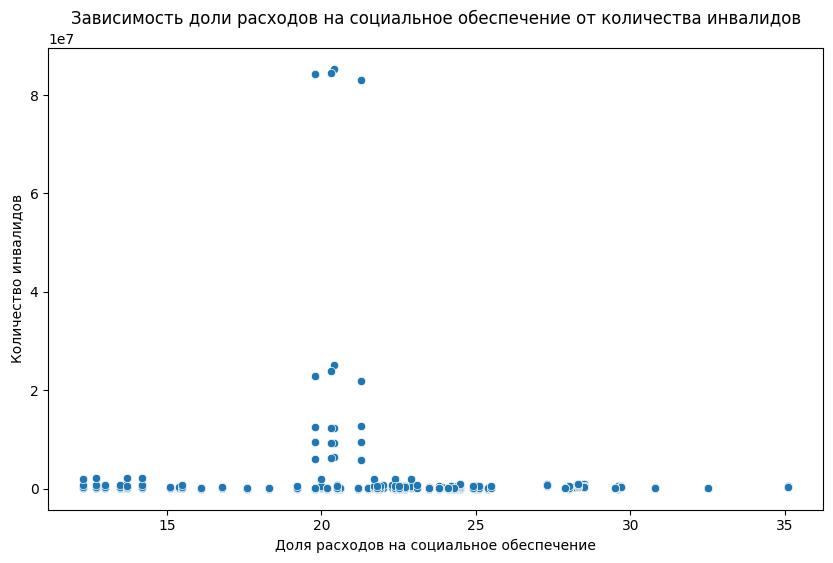

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 2: Объединение наборов данных
merged_data = pd.merge(welfare_expense_share_2015_2020_melted, 
                        disabled_total_by_age_2017_2022_final, 
                        on=['Регион', 'Год'], 
                        how='inner')

# Шаг 3: Проверка данных
print(merged_data.head())
print(merged_data.dtypes)

# Шаг 4: Преобразование столбца 'Значение' в строку и удаление запятых
merged_data['Значение'] = merged_data['Значение'].astype(str).str.replace(',', '').astype(float)

# Шаг 5: Фильтрация только числовых столбцов
numeric_data = merged_data.select_dtypes(include=[np.number])

# Шаг 6: Корреляционный анализ
correlation = numeric_data.corr()
print(correlation)

# Шаг 7: Визуализация зависимостей
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, 
                x='Доля расходов на социальное обеспечение', 
                y='Значение')
plt.title('Зависимость доли расходов на социальное обеспечение от количества инвалидов')
plt.xlabel('Доля расходов на социальное обеспечение')
plt.ylabel('Количество инвалидов')
plt.show()


### Выводы
Если цель — проанализировать влияние расходов на социальное обеспечение на количество инвалидов или другие переменные, значение 1.00 может указывать на то, что они сильно взаимосвязаны. Однако это не означает причинно-следственной связи; другие факторы могут также влиять на эту зависимость.


### ОБЩИЕ ВЫВОДЫ
Выводы по анализу социально уязвимых слоев населения
Анализ социально уязвимых слоев населения показывает, что регионы Российской Федерации сталкиваются с различными проблемами, которые могут сильно различаться по своей природе и причинам. На основании проведенного анализа можно выделить несколько ключевых выводов:

Разнообразие проблем: Каждое региональное образование имеет уникальные социально-экономические условия, что приводит к различным уровням уязвимости. Это может включать в себя различия в уровне бедности, доступности социальных услуг, состоянию здравоохранения и другим аспектам, влияющим на качество жизни граждан.

Сложные зависимости: Связи между уровнями социального обеспечения и состоянием уязвимых групп населения варьируются в зависимости от множества факторов. Например, увеличение расходов на социальное обеспечение не всегда ведет к заметному улучшению ситуации для всех слоев населения, так как могут существовать другие параллельные факторы, которые влияют на результаты.

Необходимость глубокого анализа: Для эффективного решения проблем в каждой области необходимо проводить более глубокий и тщательный анализ, учитывающий все аспекты. Это включает в себя изучение влияния экономических, социальных и культурных факторов на ситуацию в регионе.

Индивидуальный подход к регионам: Разработка и реализация социальных программ должна основываться на детальном понимании специфики каждого региона. Необходимы исследования, направленные на выявление потребностей и проблем конкретных сообществ, что позволит формировать более целенаправленные и эффективные меры поддержки.

В конечном итоге, для достижения устойчивых изменений в жизни социально уязвимых слоев населения важно учитывать многообразие проблем и проводить комплексный анализ, что позволит создать более справедливую и эффективную социальную политику.